<b> <b> Support Vector Machine Assignment </b></b>

<b> Salary Dataset </b>

<font color=blue> <b> Business Problem: </font> <br>
    <b>Prepare a classification model using SVM for Salary Data 

In [104]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [105]:
salary_train = pd.read_csv("SalaryData_Train_svm.csv")

In [106]:
salary_train

age          workclass    education  educationno        maritalstatus  \
0       39          State-gov    Bachelors           13        Never-married   
1       50   Self-emp-not-inc    Bachelors           13   Married-civ-spouse   
2       38            Private      HS-grad            9             Divorced   
3       53            Private         11th            7   Married-civ-spouse   
4       28            Private    Bachelors           13   Married-civ-spouse   
...    ...                ...          ...          ...                  ...   
30156   27            Private   Assoc-acdm           12   Married-civ-spouse   
30157   40            Private      HS-grad            9   Married-civ-spouse   
30158   58            Private      HS-grad            9              Widowed   
30159   22            Private      HS-grad            9        Never-married   
30160   52       Self-emp-inc      HS-grad            9   Married-civ-spouse   

               occupation    relationship    race      sex  capitalgain  \
0            Adm-clerical   Not-in-family   White     Male         2174   
1         Exec-managerial         Husband   White     Male            0   
2       Handlers-cleaners   Not-in-family   White     Male            0   
3       Handlers-cleaners         Husband   Black     Male            0   
4          Prof-specialty            Wife   Black   Female            0   
...                   ...             ...     ...      ...          ...   
30156        Tech-support            Wife   White   Female            0   
30157   Machine-op-inspct         Husband   White     Male            0   
30158        Adm-clerical       Unmarried   White   Female            0   
30159        Adm-clerical       Own-child   White     Male            0   
30160     Exec-managerial            Wife   White   Female        15024   

       capitalloss  hoursperweek          native  Salary  
0                0            40   United-States   <=50K  
1                0            13   United-States   <=50K  
2                0            40   United-States   <=50K  
3                0            40   United-States   <=50K  
4                0            40            Cuba   <=50K  
...            ...           ...             ...     ...  
30156            0            38   United-States   <=50K  
30157            0            40   United-States    >50K  
30158            0            40   United-States   <=50K  
30159            0            20   United-States   <=50K  
30160            0            40   United-States    >50K  

[30161 rows x 14 columns]

In [107]:
salary_test = pd.read_csv("SalaryData_Test_svm.csv")

In [108]:
salary_test

age      workclass      education  educationno        maritalstatus  \
0       25        Private           11th            7        Never-married   
1       38        Private        HS-grad            9   Married-civ-spouse   
2       28      Local-gov     Assoc-acdm           12   Married-civ-spouse   
3       44        Private   Some-college           10   Married-civ-spouse   
4       34        Private           10th            6        Never-married   
...    ...            ...            ...          ...                  ...   
15055   33        Private      Bachelors           13        Never-married   
15056   39        Private      Bachelors           13             Divorced   
15057   38        Private      Bachelors           13   Married-civ-spouse   
15058   44        Private      Bachelors           13             Divorced   
15059   35   Self-emp-inc      Bachelors           13   Married-civ-spouse   

               occupation    relationship                 race      sex  \
0       Machine-op-inspct       Own-child                Black     Male   
1         Farming-fishing         Husband                White     Male   
2         Protective-serv         Husband                White     Male   
3       Machine-op-inspct         Husband                Black     Male   
4           Other-service   Not-in-family                White     Male   
...                   ...             ...                  ...      ...   
15055      Prof-specialty       Own-child                White     Male   
15056      Prof-specialty   Not-in-family                White   Female   
15057      Prof-specialty         Husband                White     Male   
15058        Adm-clerical       Own-child   Asian-Pac-Islander     Male   
15059     Exec-managerial         Husband                White     Male   

       capitalgain  capitalloss  hoursperweek          native  Salary  
0                0            0            40   United-States   <=50K  
1                0            0            50   United-States   <=50K  
2                0            0            40   United-States    >50K  
3             7688            0            40   United-States    >50K  
4                0            0            30   United-States   <=50K  
...            ...          ...           ...             ...     ...  
15055            0            0            40   United-States   <=50K  
15056            0            0            36   United-States   <=50K  
15057            0            0            50   United-States   <=50K  
15058         5455            0            40   United-States   <=50K  
15059            0            0            60   United-States    >50K  

[15060 rows x 14 columns]

In [109]:
raw_data = salary_train.append(salary_test)
raw_data.reset_index(inplace=True, drop=True)

In [110]:
raw_data

age          workclass   education  educationno        maritalstatus  \
0       39          State-gov   Bachelors           13        Never-married   
1       50   Self-emp-not-inc   Bachelors           13   Married-civ-spouse   
2       38            Private     HS-grad            9             Divorced   
3       53            Private        11th            7   Married-civ-spouse   
4       28            Private   Bachelors           13   Married-civ-spouse   
...    ...                ...         ...          ...                  ...   
45216   33            Private   Bachelors           13        Never-married   
45217   39            Private   Bachelors           13             Divorced   
45218   38            Private   Bachelors           13   Married-civ-spouse   
45219   44            Private   Bachelors           13             Divorced   
45220   35       Self-emp-inc   Bachelors           13   Married-civ-spouse   

               occupation    relationship                 race      sex  \
0            Adm-clerical   Not-in-family                White     Male   
1         Exec-managerial         Husband                White     Male   
2       Handlers-cleaners   Not-in-family                White     Male   
3       Handlers-cleaners         Husband                Black     Male   
4          Prof-specialty            Wife                Black   Female   
...                   ...             ...                  ...      ...   
45216      Prof-specialty       Own-child                White     Male   
45217      Prof-specialty   Not-in-family                White   Female   
45218      Prof-specialty         Husband                White     Male   
45219        Adm-clerical       Own-child   Asian-Pac-Islander     Male   
45220     Exec-managerial         Husband                White     Male   

       capitalgain  capitalloss  hoursperweek          native  Salary  
0             2174            0            40   United-States   <=50K  
1                0            0            13   United-States   <=50K  
2                0            0            40   United-States   <=50K  
3                0            0            40   United-States   <=50K  
4                0            0            40            Cuba   <=50K  
...            ...          ...           ...             ...     ...  
45216            0            0            40   United-States   <=50K  
45217            0            0            36   United-States   <=50K  
45218            0            0            50   United-States   <=50K  
45219         5455            0            40   United-States   <=50K  
45220            0            0            60   United-States    >50K  

[45221 rows x 14 columns]

In [111]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45221 entries, 0 to 45220
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            45221 non-null  int64 
 1   workclass      45221 non-null  object
 2   education      45221 non-null  object
 3   educationno    45221 non-null  int64 
 4   maritalstatus  45221 non-null  object
 5   occupation     45221 non-null  object
 6   relationship   45221 non-null  object
 7   race           45221 non-null  object
 8   sex            45221 non-null  object
 9   capitalgain    45221 non-null  int64 
 10  capitalloss    45221 non-null  int64 
 11  hoursperweek   45221 non-null  int64 
 12  native         45221 non-null  object
 13  Salary         45221 non-null  object
dtypes: int64(5), object(9)
memory usage: 4.8+ MB


In [112]:
raw_data.describe()

age   educationno   capitalgain   capitalloss  hoursperweek
count  45221.000000  45221.000000  45221.000000  45221.000000  45221.000000
mean      38.548086     10.118463   1101.454700     88.548617     40.938038
std       13.217981      2.552909   7506.511295    404.838249     12.007640
min       17.000000      1.000000      0.000000      0.000000      1.000000
25%       28.000000      9.000000      0.000000      0.000000     40.000000
50%       37.000000     10.000000      0.000000      0.000000     40.000000
75%       47.000000     13.000000      0.000000      0.000000     45.000000
max       90.000000     16.000000  99999.000000   4356.000000     99.000000

In [113]:
raw_data.describe()

age   educationno   capitalgain   capitalloss  hoursperweek
count  45221.000000  45221.000000  45221.000000  45221.000000  45221.000000
mean      38.548086     10.118463   1101.454700     88.548617     40.938038
std       13.217981      2.552909   7506.511295    404.838249     12.007640
min       17.000000      1.000000      0.000000      0.000000      1.000000
25%       28.000000      9.000000      0.000000      0.000000     40.000000
50%       37.000000     10.000000      0.000000      0.000000     40.000000
75%       47.000000     13.000000      0.000000      0.000000     45.000000
max       90.000000     16.000000  99999.000000   4356.000000     99.000000

In [114]:
#Missing Values
raw_data.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [115]:
#duplicated_values
raw_data[raw_data.duplicated()]

age workclass      education  educationno        maritalstatus  \
326     33   Private      Bachelors           13   Married-civ-spouse   
364     27   Private      Bachelors           13        Never-married   
518     24   Private        HS-grad            9        Never-married   
525     24   Private        HS-grad            9        Never-married   
619     33   Private      Bachelors           13   Married-civ-spouse   
...    ...       ...            ...          ...                  ...   
45205   22   Private   Some-college           10        Never-married   
45210   32   Private        HS-grad            9   Married-civ-spouse   
45213   31   Private        HS-grad            9   Married-civ-spouse   
45214   25   Private        HS-grad            9        Never-married   
45218   38   Private      Bachelors           13   Married-civ-spouse   

               occupation    relationship    race      sex  capitalgain  \
326       Exec-managerial         Husband   White     Male            0   
364          Craft-repair   Not-in-family   White     Male            0   
518     Handlers-cleaners       Unmarried   Black   Female            0   
525          Craft-repair       Own-child   White     Male            0   
619       Exec-managerial         Husband   White     Male            0   
...                   ...             ...     ...      ...          ...   
45205        Craft-repair       Own-child   White     Male            0   
45210   Handlers-cleaners         Husband   White     Male            0   
45213        Craft-repair         Husband   White     Male            0   
45214       Other-service       Own-child   White   Female            0   
45218      Prof-specialty         Husband   White     Male            0   

       capitalloss  hoursperweek          native  Salary  
326              0            40   United-States    >50K  
364              0            50   United-States   <=50K  
518              0            40   United-States   <=50K  
525              0            40   United-States   <=50K  
619              0            40   United-States    >50K  
...            ...           ...             ...     ...  
45205            0            40   United-States   <=50K  
45210            0            40   United-States   <=50K  
45213            0            40   United-States   <=50K  
45214            0            40   United-States   <=50K  
45218            0            50   United-States   <=50K  

[5982 rows x 14 columns]

In [116]:
raw_data[raw_data.duplicated()].shape

(5982, 14)

In [117]:
raw_data.drop_duplicates(inplace=True)

In [118]:
raw_data.shape

(39239, 14)

In [119]:
raw_data[raw_data.duplicated()]

Empty DataFrame
Columns: [age, workclass, education, educationno, maritalstatus, occupation, relationship, race, sex, capitalgain, capitalloss, hoursperweek, native, Salary]
Index: []

In [120]:
raw_data

age          workclass   education  educationno        maritalstatus  \
0       39          State-gov   Bachelors           13        Never-married   
1       50   Self-emp-not-inc   Bachelors           13   Married-civ-spouse   
2       38            Private     HS-grad            9             Divorced   
3       53            Private        11th            7   Married-civ-spouse   
4       28            Private   Bachelors           13   Married-civ-spouse   
...    ...                ...         ...          ...                  ...   
45215   48          Local-gov     Masters           14             Divorced   
45216   33            Private   Bachelors           13        Never-married   
45217   39            Private   Bachelors           13             Divorced   
45219   44            Private   Bachelors           13             Divorced   
45220   35       Self-emp-inc   Bachelors           13   Married-civ-spouse   

               occupation    relationship                 race      sex  \
0            Adm-clerical   Not-in-family                White     Male   
1         Exec-managerial         Husband                White     Male   
2       Handlers-cleaners   Not-in-family                White     Male   
3       Handlers-cleaners         Husband                Black     Male   
4          Prof-specialty            Wife                Black   Female   
...                   ...             ...                  ...      ...   
45215       Other-service   Not-in-family                White     Male   
45216      Prof-specialty       Own-child                White     Male   
45217      Prof-specialty   Not-in-family                White   Female   
45219        Adm-clerical       Own-child   Asian-Pac-Islander     Male   
45220     Exec-managerial         Husband                White     Male   

       capitalgain  capitalloss  hoursperweek          native  Salary  
0             2174            0            40   United-States   <=50K  
1                0            0            13   United-States   <=50K  
2                0            0            40   United-States   <=50K  
3                0            0            40   United-States   <=50K  
4                0            0            40            Cuba   <=50K  
...            ...          ...           ...             ...     ...  
45215            0            0            40   United-States   <=50K  
45216            0            0            40   United-States   <=50K  
45217            0            0            36   United-States   <=50K  
45219         5455            0            40   United-States   <=50K  
45220            0            0            60   United-States    >50K  

[39239 rows x 14 columns]

Numericals variables

In [121]:
numerical_variables = [i for i in raw_data.columns if raw_data[i].dtypes != 'O']
print("Number of Numerical Variables: ", len(numerical_variables))

raw_data[numerical_variables].head()

Number of Numerical Variables:  5


age  educationno  capitalgain  capitalloss  hoursperweek
0   39           13         2174            0            40
1   50           13            0            0            13
2   38            9            0            0            40
3   53            7            0            0            40
4   28           13            0            0            40

In [122]:
descrete_variables = [i for i in numerical_variables if len(raw_data[i].unique())<25]
print('Number of Descrete Features: ', descrete_variables)

raw_data[descrete_variables]

Number of Descrete Features:  ['educationno']


educationno
0               13
1               13
2                9
3                7
4               13
...            ...
45215           14
45216           13
45217           13
45219           13
45220           13

[39239 rows x 1 columns]

In [123]:
continuous_variables = [i for i in numerical_variables if i not in descrete_variables]
print("Continuous Features are: ", continuous_variables)

Continuous Features are:  ['age', 'capitalgain', 'capitalloss', 'hoursperweek']


In [124]:
categorical = [i for i in raw_data if raw_data[i].dtypes=='O']
print('Number of Categorical Variables: ', len(categorical))
print('\nCategorical Variables: ', categorical)

Number of Categorical Variables:  9

Categorical Variables:  ['workclass', 'education', 'maritalstatus', 'occupation', 'relationship', 'race', 'sex', 'native', 'Salary']


In [125]:
for i in categorical:
    print(raw_data[i].value_counts(), "\n")

 Private             27716
 Self-emp-not-inc     3669
 Local-gov            2975
 State-gov            1892
 Self-emp-inc         1595
 Federal-gov          1371
 Without-pay            21
Name: workclass, dtype: int64 

 HS-grad         12003
 Some-college     8456
 Bachelors        6522
 Masters          2357
 Assoc-voc        1859
 Assoc-acdm       1470
 11th             1422
 10th             1136
 7th-8th           801
 Prof-school       764
 9th               658
 12th              540
 Doctorate         526
 5th-6th           438
 1st-4th           217
 Preschool          70
Name: education, dtype: int64 

 Married-civ-spouse       17947
 Never-married            12168
 Divorced                  5885
 Separated                 1394
 Widowed                   1261
 Married-spouse-absent      552
 Married-AF-spouse           32
Name: maritalstatus, dtype: int64 

 Prof-specialty       5516
 Exec-managerial      5311
 Adm-clerical         4742
 Sales                4671
 Craft-repa

In [126]:
#frequency distribution of categorical variables:

for i in categorical:
    print(raw_data[i].value_counts()/np.float(len(raw_data)), "\n")

 Private             0.706338
 Self-emp-not-inc    0.093504
 Local-gov           0.075817
 State-gov           0.048217
 Self-emp-inc        0.040648
 Federal-gov         0.034940
 Without-pay         0.000535
Name: workclass, dtype: float64 

 HS-grad         0.305895
 Some-college    0.215500
 Bachelors       0.166212
 Masters         0.060068
 Assoc-voc       0.047376
 Assoc-acdm      0.037463
 11th            0.036239
 10th            0.028951
 7th-8th         0.020413
 Prof-school     0.019470
 9th             0.016769
 12th            0.013762
 Doctorate       0.013405
 5th-6th         0.011162
 1st-4th         0.005530
 Preschool       0.001784
Name: education, dtype: float64 

 Married-civ-spouse       0.457377
 Never-married            0.310100
 Divorced                 0.149978
 Separated                0.035526
 Widowed                  0.032136
 Married-spouse-absent    0.014068
 Married-AF-spouse        0.000816
Name: maritalstatus, dtype: float64 

 Prof-specialty       0

Number of Labels: cardinality

In [127]:
for i in categorical:
    print(i, 'contains', len(raw_data[i].unique()), 'labels')

workclass contains 7 labels
education contains 16 labels
maritalstatus contains 7 labels
occupation contains 14 labels
relationship contains 6 labels
race contains 5 labels
sex contains 2 labels
native contains 40 labels
Salary contains 2 labels


In [128]:
raw_data.corr()

age  educationno  capitalgain  capitalloss  hoursperweek
age           1.000000     0.030211     0.075495     0.049876      0.066927
educationno   0.030211     1.000000     0.129552     0.082594      0.136030
capitalgain   0.075495     0.129552     1.000000    -0.036791      0.082977
capitalloss   0.049876     0.082594    -0.036791     1.000000      0.050638
hoursperweek  0.066927     0.136030     0.082977     0.050638      1.000000

Exploratory Data Analysis: 

<AxesSubplot:>

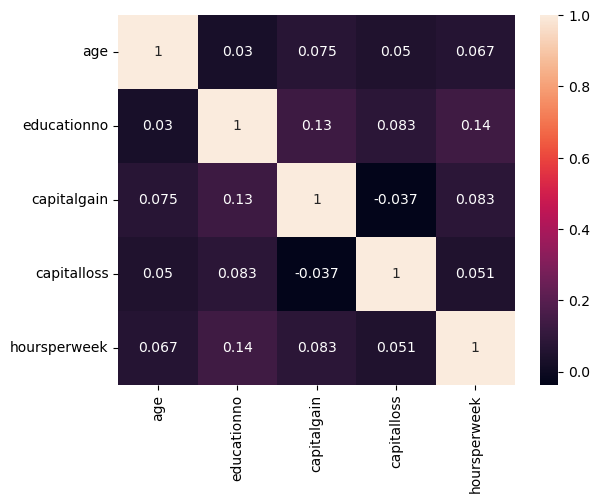

In [129]:
sns.heatmap(raw_data.corr(), annot=True)

Univariate Analysis: 

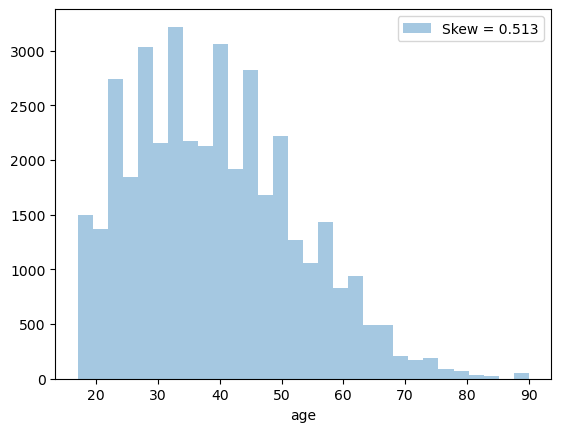

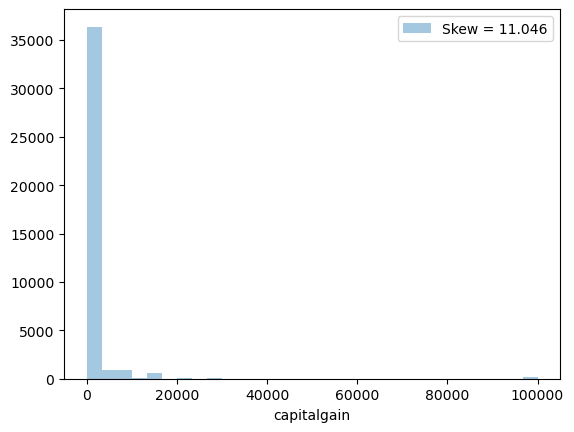

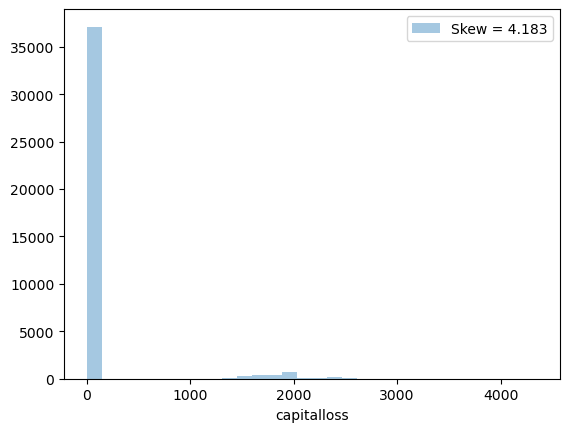

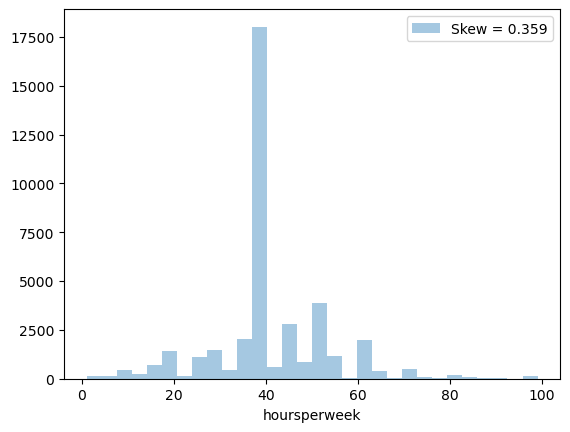

In [130]:
for i in continuous_variables: 
    skew = raw_data[i].skew()
    sns.distplot(raw_data[i], kde=False, label='Skew = %.3f'%(skew), bins=30)
    plt.legend(loc='best')
    plt.show()

In [131]:
continuous_variables

['age', 'capitalgain', 'capitalloss', 'hoursperweek']

Outlier Detection: 

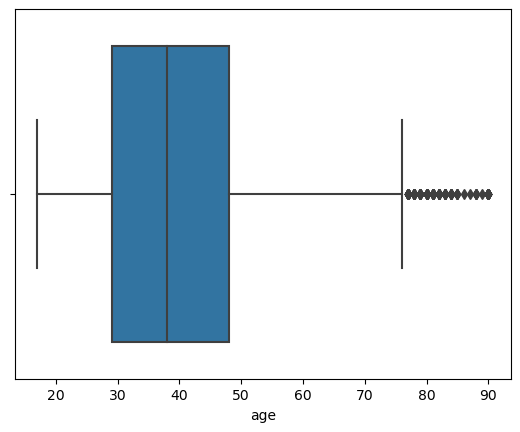

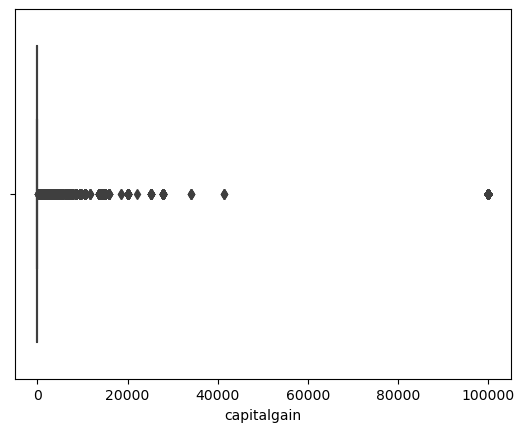

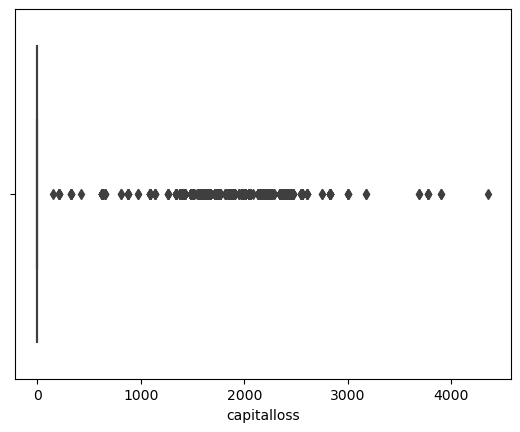

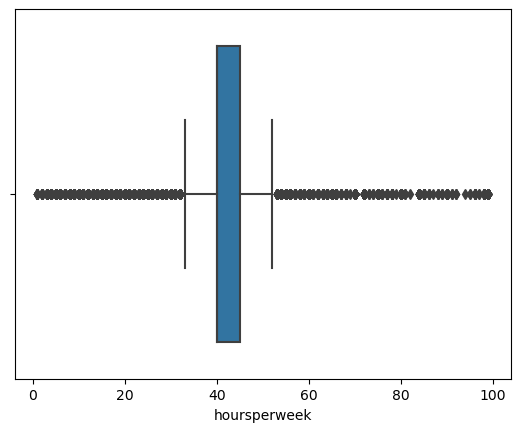

In [132]:
for i in continuous_variables:
    sns.boxplot(raw_data[i])
    plt.show()

After Log Transformation:


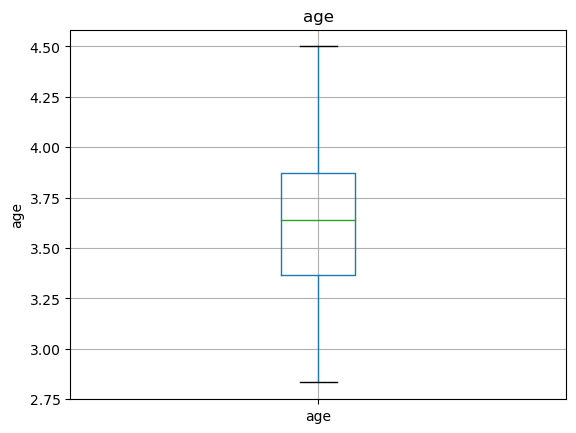

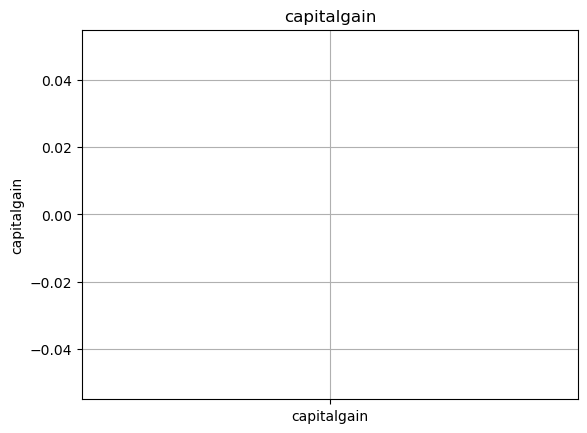

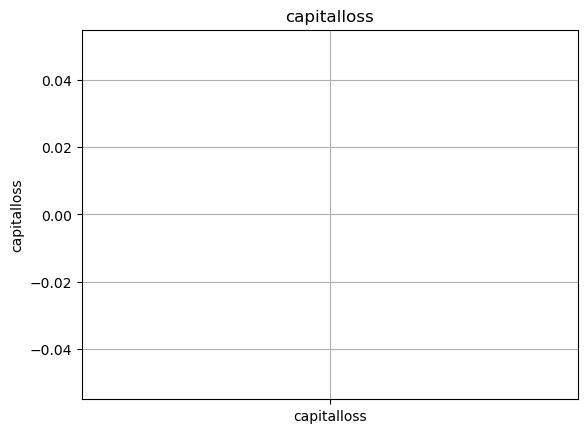

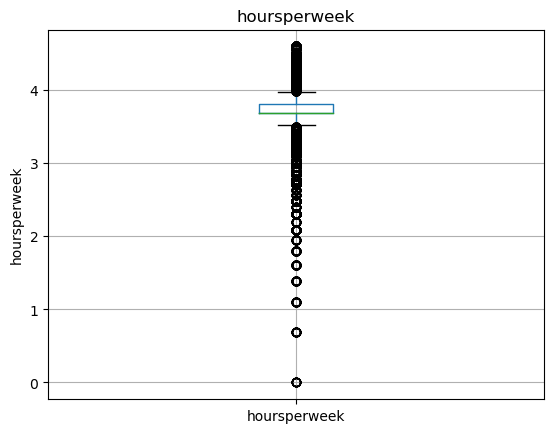

In [133]:
for i in continuous_variables:
    data = raw_data.copy()
    data[i] = np.log(data[i])
    data.boxplot(column=i)
    plt.ylabel(i)
    plt.title(i)
    plt.show()

Visualizing the distribution of "Age" and "hoursperweek" : 

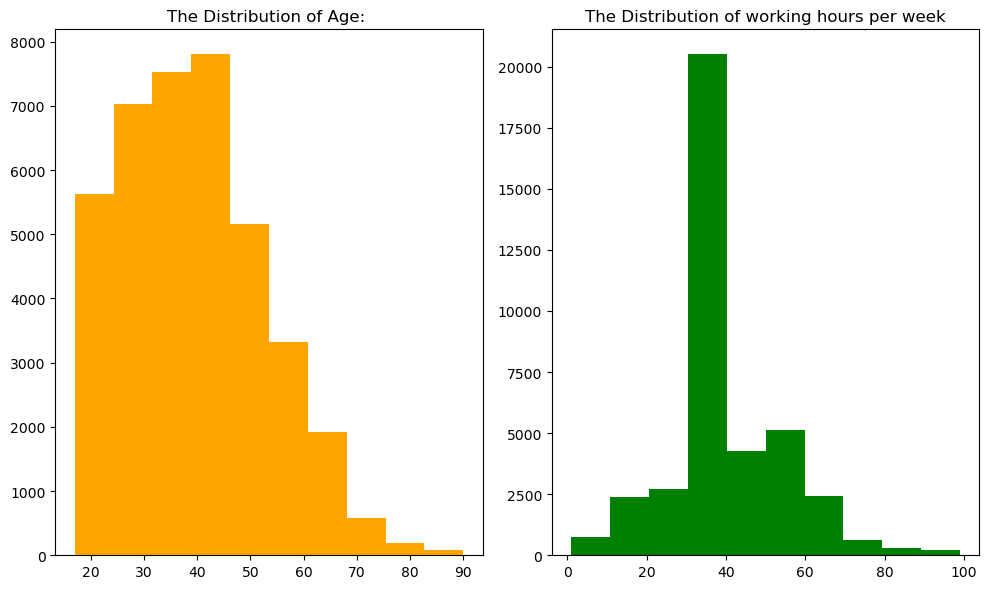

In [134]:
dist_age_bal = plt.figure(figsize=(10,6))

r1 = dist_age_bal.add_subplot(1,2,1)
r2 = dist_age_bal.add_subplot(1,2,2)

r1.hist(raw_data['age'], color='orange')
r1.set_title('The Distribution of Age: ')

r2.hist(raw_data['hoursperweek'], color='green')
r2.set_title("The Distribution of working hours per week")

plt.tight_layout()
plt.show()

In [135]:
raw_data[['age', 'hoursperweek']].describe()

age  hoursperweek
count  39239.000000  39239.000000
mean      39.309412     41.206121
std       13.298159     12.458178
min       17.000000      1.000000
25%       29.000000     40.000000
50%       38.000000     40.000000
75%       48.000000     45.000000
max       90.000000     99.000000

Visualizing numerical columns affecting Salary: 

Age and Salary: 

In [136]:

b_df=pd.DataFrame()
b_df['age_wrt_salary_more_than_50k']=(raw_data[raw_data['Salary']==' <=50K'][['Salary','age']].describe())['age']
b_df['age_wrt_salary_less_than_50k']=(raw_data[raw_data['Salary']==' >50K'][['Salary','age']].describe())['age']

b_df

age_wrt_salary_more_than_50k  age_wrt_salary_less_than_50k
count                  29264.000000                   9975.000000
mean                      37.645742                     44.190175
std                       13.724069                     10.542628
min                       17.000000                     19.000000
25%                       27.000000                     36.000000
50%                       35.000000                     44.000000
75%                       47.000000                     51.000000
max                       90.000000                     90.000000

<AxesSubplot:title={'center':'Age and Salary Statistics'}>

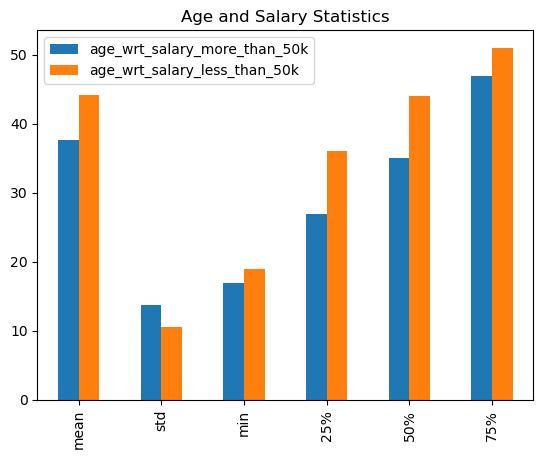

In [137]:
b_df.drop(['count', 'max']).plot.bar(title="Age and Salary Statistics")

Capitalgain and Salary: 

In [138]:
a_df = pd.DataFrame()
a_df['capitalgain_wrt_salary_more_than_50k'] = (raw_data[raw_data['Salary'] == ' <=50K'][['Salary','capitalgain']].describe())['capitalgain']
a_df['capitalgain_wrt_salary_less_than_50k'] = (raw_data[raw_data['Salary'] == ' >50K'][['Salary','capitalgain']].describe())['capitalgain']

a_df

capitalgain_wrt_salary_more_than_50k  \
count                          29264.000000   
mean                             172.763293   
std                              997.058351   
min                                0.000000   
25%                                0.000000   
50%                                0.000000   
75%                                0.000000   
max                            41310.000000   

       capitalgain_wrt_salary_less_than_50k  
count                           9975.000000  
mean                            4423.489323  
std                            15330.131156  
min                                0.000000  
25%                                0.000000  
50%                                0.000000  
75%                                0.000000  
max                            99999.000000

<AxesSubplot:title={'center':'Age and Salary Statistics'}>

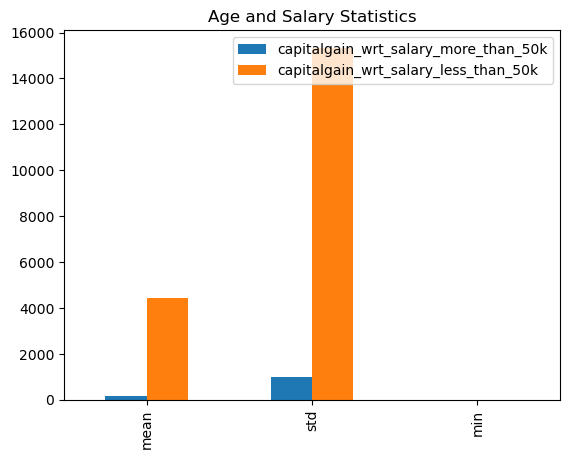

In [139]:
a_df.drop(['count', '50%', '25%', '75%', 'max']).plot.bar(title="Age and Salary Statistics")

Capitalloss and deposit: 

In [140]:
c_df = pd.DataFrame()
c_df['capitalloss_wrt_salary_more_than_50k'] = (raw_data[raw_data['Salary'] == ' <=50K'][['Salary','capitalloss']].describe())['capitalloss']
c_df['capitalloss_wrt_salary_less_than_50k'] = (raw_data[raw_data['Salary'] == ' >50K'][['Salary','capitalloss']].describe())['capitalloss']

c_df

capitalloss_wrt_salary_more_than_50k  \
count                          29264.000000   
mean                              62.614612   
std                              335.299052   
min                                0.000000   
25%                                0.000000   
50%                                0.000000   
75%                                0.000000   
max                             4356.000000   

       capitalloss_wrt_salary_less_than_50k  
count                           9975.000000  
mean                             214.429674  
std                              620.321810  
min                                0.000000  
25%                                0.000000  
50%                                0.000000  
75%                                0.000000  
max                             3683.000000

<AxesSubplot:title={'center':'Age and Salary Statistics'}>

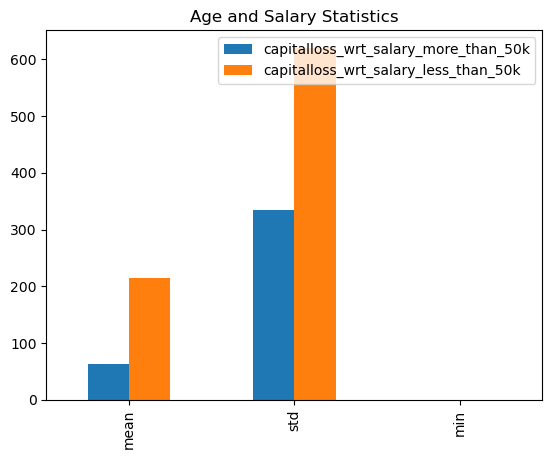

In [141]:
c_df.drop(['count', '50%', '25%', '75%', 'max']).plot.bar(title="Age and Salary Statistics")

hoursperweek and deposit: 

In [142]:
p_df = pd.DataFrame()
p_df['hoursperweek_wrt_salary_more_than_50k'] = (raw_data[raw_data['Salary'] == ' <=50K'][['Salary','hoursperweek']].describe())['hoursperweek']
p_df['hoursperweek_wrt_salary_less_than_50k'] = (raw_data[raw_data['Salary'] == ' >50K'][['Salary','hoursperweek']].describe())['hoursperweek']

p_df

hoursperweek_wrt_salary_more_than_50k  \
count                           29264.000000   
mean                               39.595612   
std                                12.451170   
min                                 1.000000   
25%                                36.000000   
50%                                40.000000   
75%                                44.000000   
max                                99.000000   

       hoursperweek_wrt_salary_less_than_50k  
count                            9975.000000  
mean                               45.930927  
std                                11.215963  
min                                 1.000000  
25%                                40.000000  
50%                                43.000000  
75%                                50.000000  
max                                99.000000

<AxesSubplot:title={'center':'Age and Salary Statistics'}>

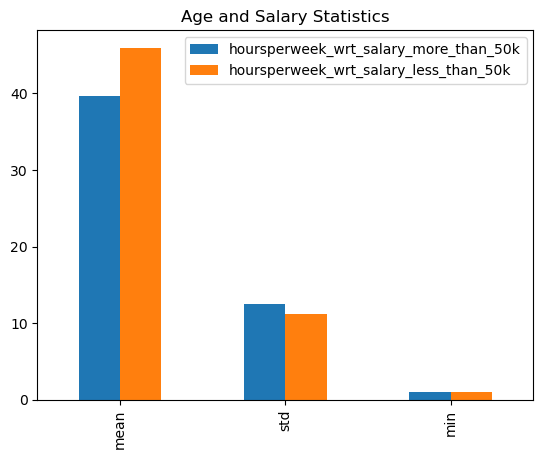

In [143]:
p_df.drop(['count', '50%', '25%', '75%', 'max']).plot.bar(title="Age and Salary Statistics")

In [144]:
categorical_features=[i for i in raw_data.columns if raw_data[i].dtype=='O']
print('Number of Categorical Features:',len(categorical_features), '\n', categorical_features)

Number of Categorical Features: 9 
 ['workclass', 'education', 'maritalstatus', 'occupation', 'relationship', 'race', 'sex', 'native', 'Salary']


In [145]:
raw_data[categorical_features].head()

workclass   education        maritalstatus          occupation  \
0          State-gov   Bachelors        Never-married        Adm-clerical   
1   Self-emp-not-inc   Bachelors   Married-civ-spouse     Exec-managerial   
2            Private     HS-grad             Divorced   Handlers-cleaners   
3            Private        11th   Married-civ-spouse   Handlers-cleaners   
4            Private   Bachelors   Married-civ-spouse      Prof-specialty   

     relationship    race      sex          native  Salary  
0   Not-in-family   White     Male   United-States   <=50K  
1         Husband   White     Male   United-States   <=50K  
2   Not-in-family   White     Male   United-States   <=50K  
3         Husband   Black     Male   United-States   <=50K  
4            Wife   Black   Female            Cuba   <=50K

In [146]:
for i in categorical_features:
    print("Number of features in", i, "category: ", len(raw_data[i].unique()))
    print(raw_data[i].unique())
    print(raw_data[i].value_counts(), "\n\n")

Number of features in workclass category:  7
[' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' Self-emp-inc' ' Without-pay']
 Private             27716
 Self-emp-not-inc     3669
 Local-gov            2975
 State-gov            1892
 Self-emp-inc         1595
 Federal-gov          1371
 Without-pay            21
Name: workclass, dtype: int64 


Number of features in education category:  16
[' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' 7th-8th' ' Doctorate' ' Assoc-voc' ' Prof-school'
 ' 5th-6th' ' 10th' ' Preschool' ' 12th' ' 1st-4th']
 HS-grad         12003
 Some-college     8456
 Bachelors        6522
 Masters          2357
 Assoc-voc        1859
 Assoc-acdm       1470
 11th             1422
 10th             1136
 7th-8th           801
 Prof-school       764
 9th               658
 12th              540
 Doctorate         526
 5th-6th           438
 1st-4th           217
 Preschool          70
Name: education, dtype: in

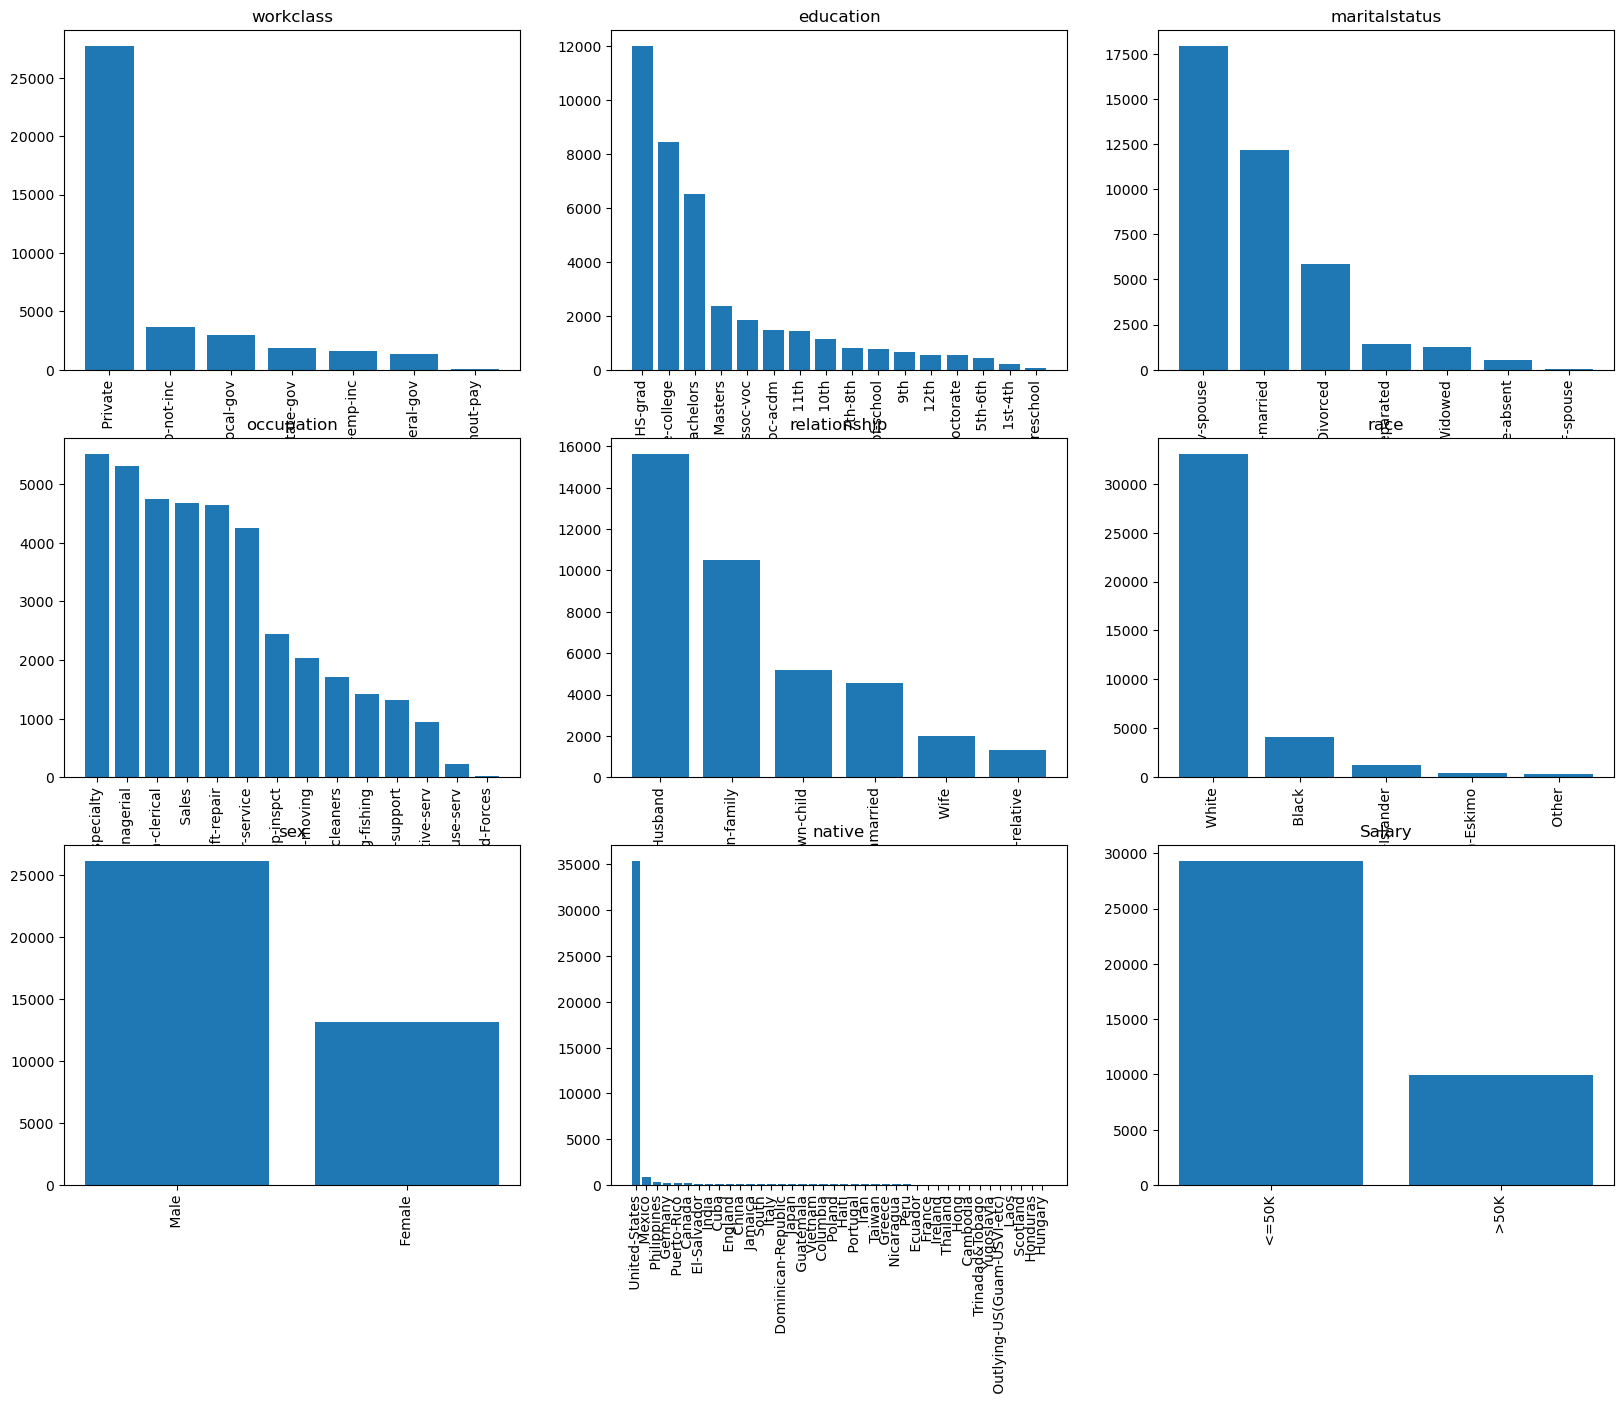

In [147]:
fig, axs = plt.subplots(3,3, sharex=False, sharey=False, figsize=(20,15))

counter = 0
for i in categorical_features:
    value_counts = raw_data[i].value_counts()
    
    trace_x = counter//3
    trace_y = counter%3
    x_pos = np.arange(0, len(value_counts))
    
    axs[trace_x, trace_y].bar(x_pos, value_counts.values, tick_label=value_counts.index)
    
    axs[trace_x, trace_y].set_title(i)
    
    for ticks in axs[trace_x, trace_y].get_xticklabels():
        ticks.set_rotation(90)
        
    counter+=1
    

    
plt.show()
    

Analysing the Target Column: <br>
We will look towards the information that our target variable holds. In this case we have "Salary" as a target variable and we will compare it with other independent variables.

In [148]:
lessthan50 = len(raw_data[raw_data.Salary == ' <=50K'])
greaterthan50 = len(raw_data[raw_data.Salary==' >50K'])
print("Total Counts of Salary <=50K:",lessthan50, '---> Percentage:',(lessthan50/len(raw_data.Salary))*100 )
print("Total Counts of Salary >50K:",greaterthan50, '---> Percentage:',(greaterthan50/len(raw_data.Salary))*100 )


Total Counts of Salary <=50K: 29264 ---> Percentage: 74.57886286602616
Total Counts of Salary >50K: 9975 ---> Percentage: 25.421137133973854


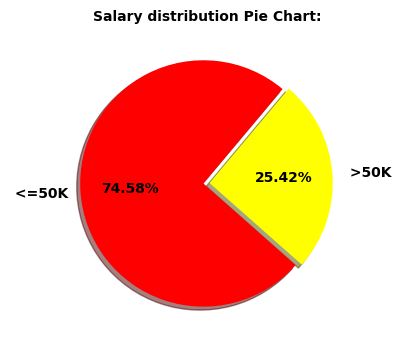

In [149]:
plt.figure(figsize=(4,4))
plt.pie(raw_data['Salary'].value_counts(),
       labels=raw_data.Salary.unique(),
       autopct='%.2f%%',
       shadow=True,
       colors=['red', 'yellow'],
       textprops={'size':'medium',
                 'fontweight':'bold',
                 'color':'black'},
       startangle=50,
       explode=[0.05, 0.0])

#plt.legend(loc='upper right')
plt.title("Salary distribution Pie Chart: ", fontsize=10, fontweight='bold')
plt.show()

Visualizing and analyzing  relationship of categorical variables w.r.t to the Target variable: 

<AxesSubplot:>

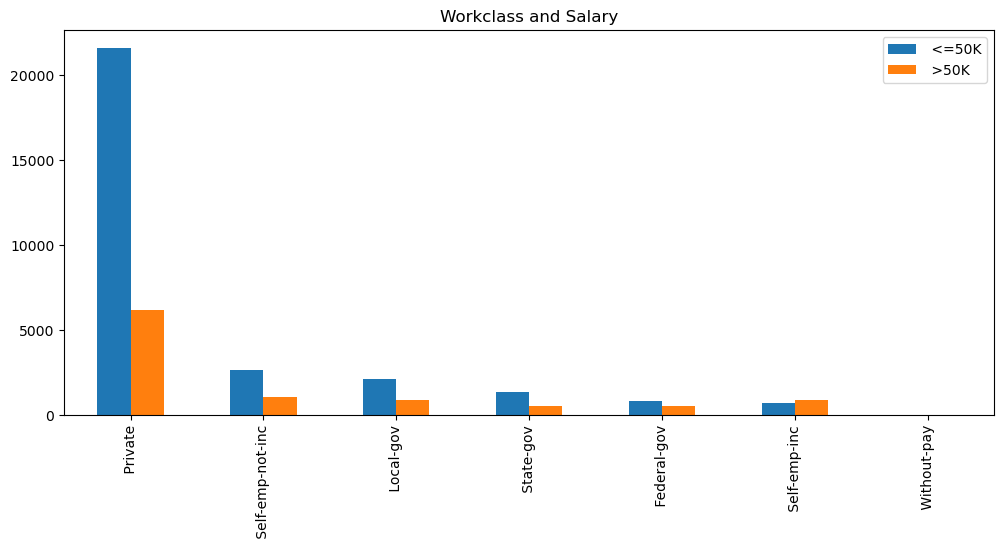

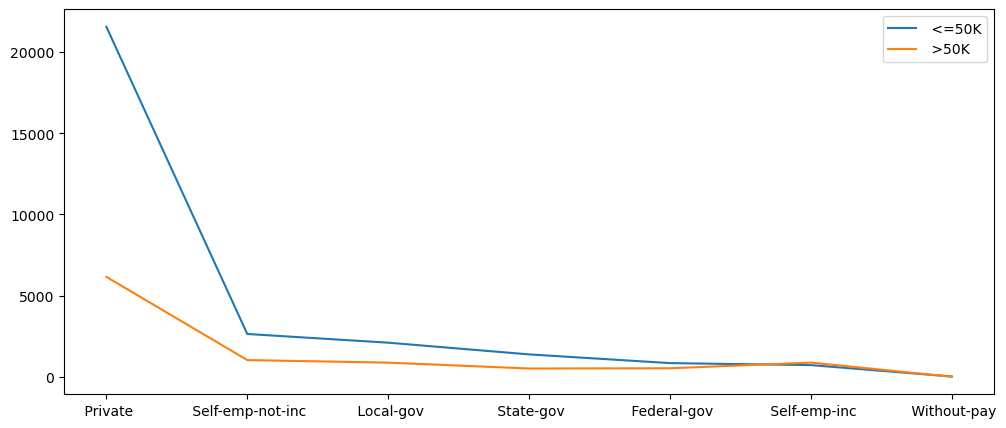

In [150]:
#workclass and Salary

j_df = pd.DataFrame()
j_df[' <=50K'] = raw_data[raw_data['Salary'] == ' <=50K']['workclass'].value_counts()
j_df[' >50K'] = raw_data[raw_data['Salary'] == ' >50K']['workclass'].value_counts()
j_df.plot.bar(title='Workclass and Salary', figsize=(12,5))
j_df.plot(figsize=(12,5))

<AxesSubplot:xlabel='Salary', ylabel='workclass'>

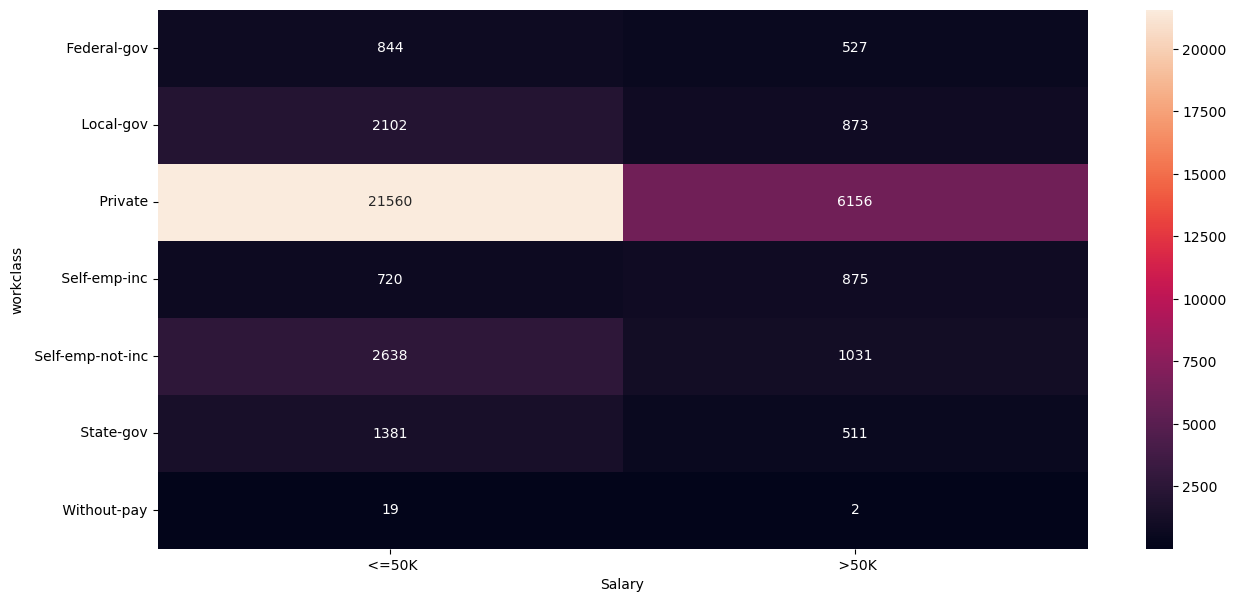

In [151]:
fig = plt.figure(figsize=(15,7))
sns.heatmap(pd.crosstab(index=raw_data['workclass'], columns=raw_data['Salary']), fmt='g', annot=True)

<AxesSubplot:>

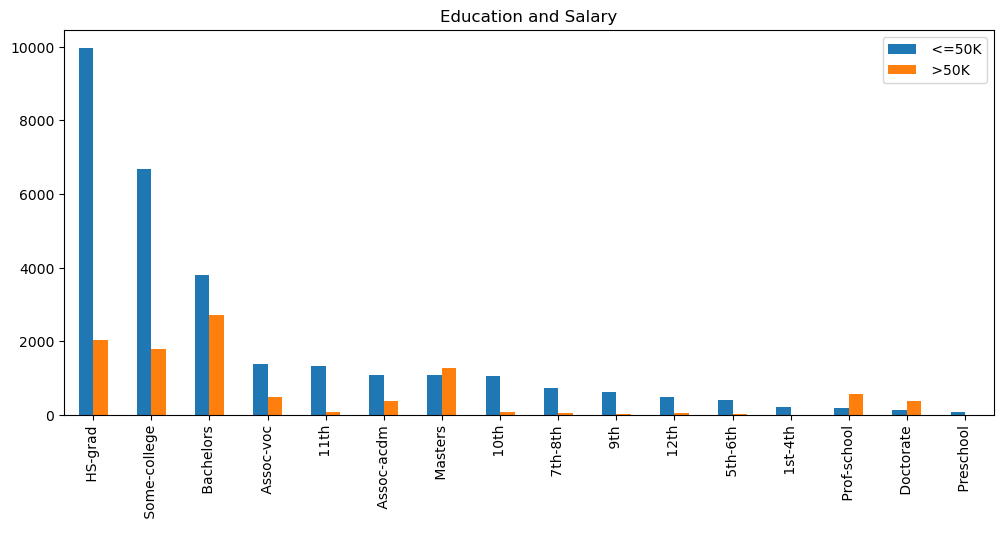

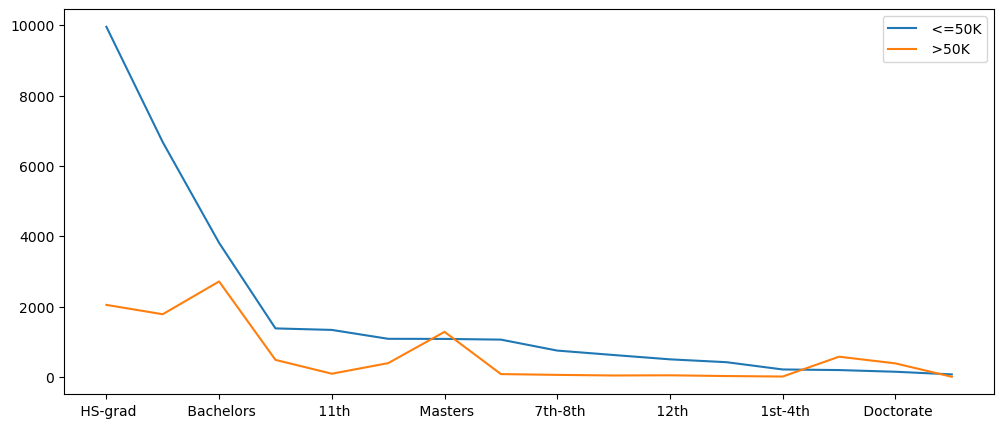

In [152]:
#education and salary

j_df = pd.DataFrame()
j_df[' <=50K'] = raw_data[raw_data['Salary'] == ' <=50K']['education'].value_counts()
j_df[' >50K'] = raw_data[raw_data['Salary'] == ' >50K']['education'].value_counts()
j_df.plot.bar(title='Education and Salary', figsize=(12,5))
j_df.plot(figsize=(12,5))

<AxesSubplot:xlabel='Salary', ylabel='education'>

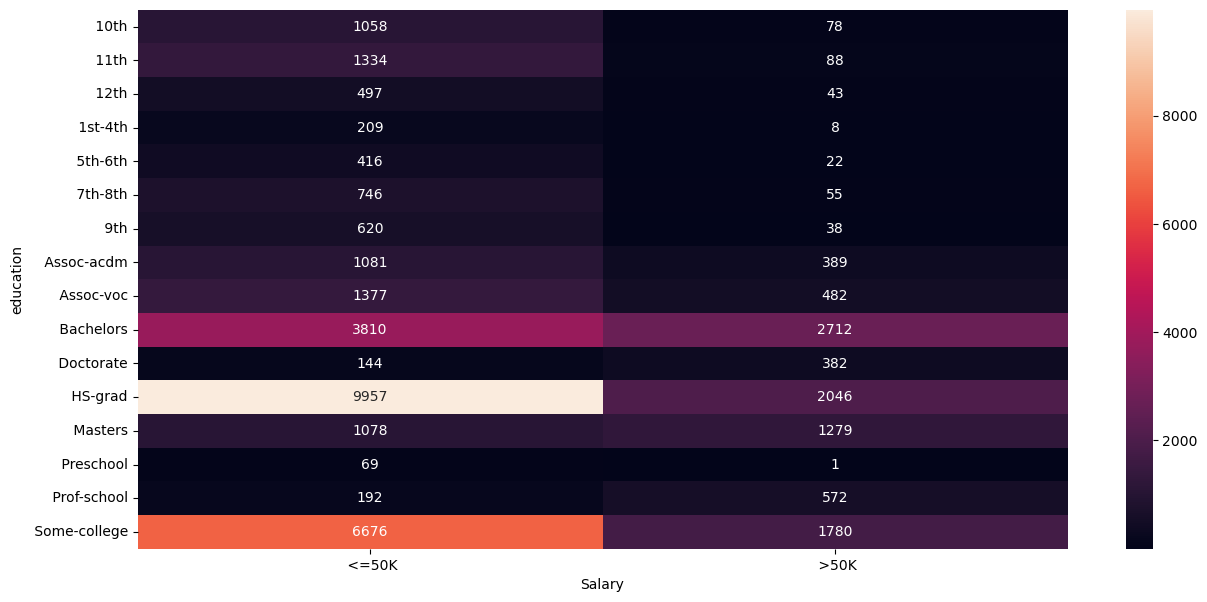

In [153]:
fig = plt.figure(figsize=(15,7))
sns.heatmap(pd.crosstab(index=raw_data['education'], columns=raw_data['Salary']), fmt='g', annot=True)

<AxesSubplot:>

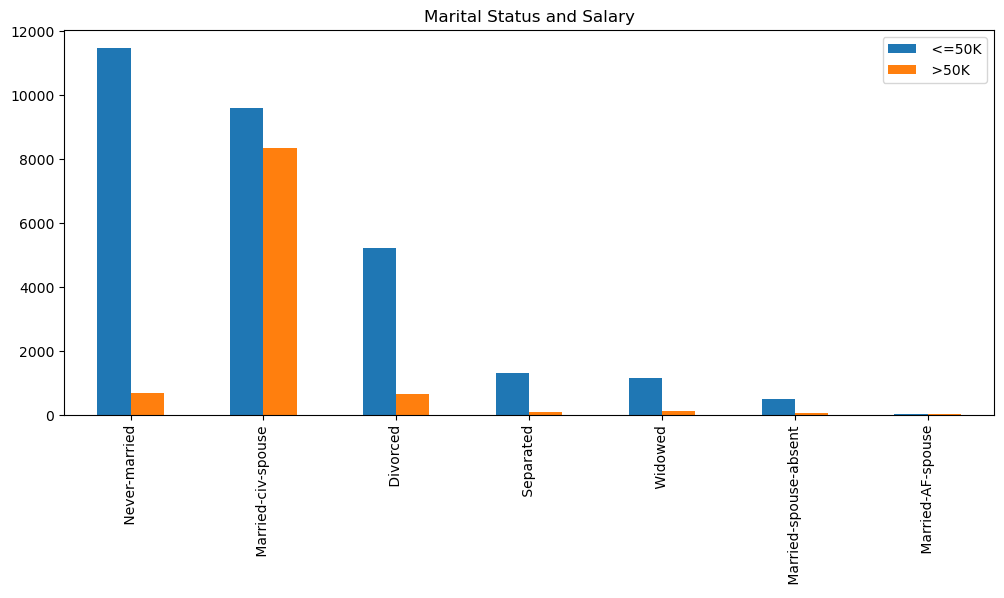

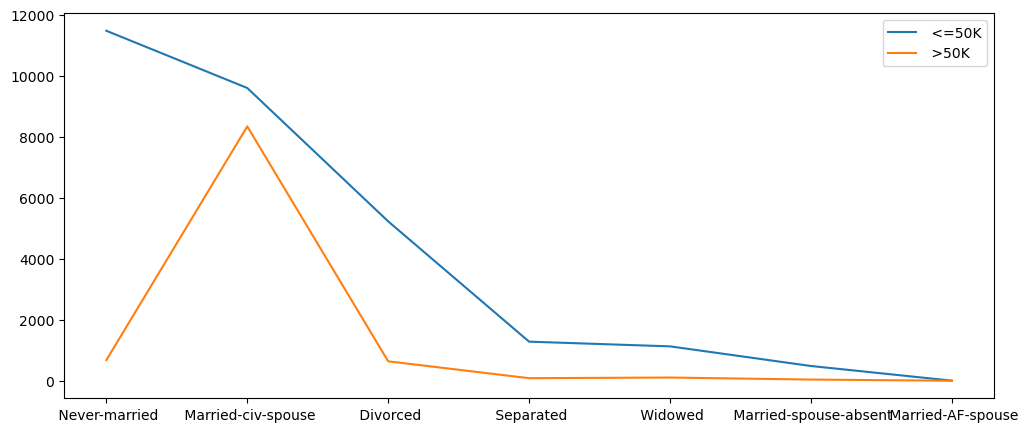

In [154]:
#marital and salary

j_df = pd.DataFrame()
j_df[' <=50K'] = raw_data[raw_data['Salary'] == ' <=50K']['maritalstatus'].value_counts()
j_df[' >50K'] = raw_data[raw_data['Salary'] == ' >50K']['maritalstatus'].value_counts()
j_df.plot.bar(title='Marital Status and Salary', figsize=(12,5))
j_df.plot(figsize=(12,5))

<AxesSubplot:xlabel='Salary', ylabel='maritalstatus'>

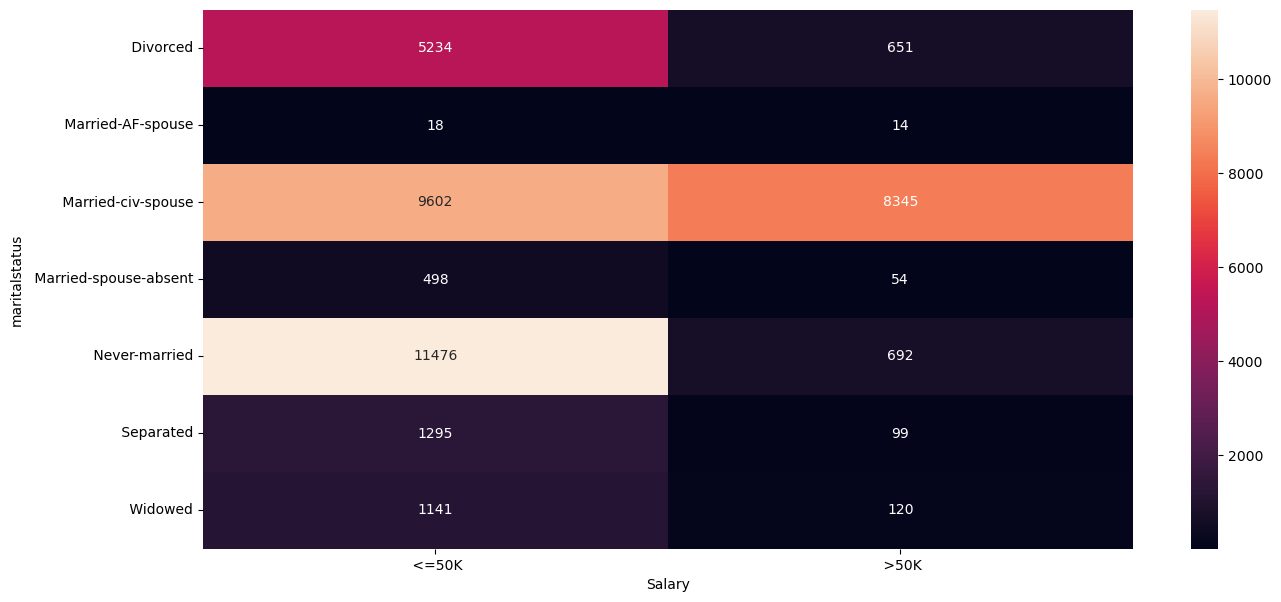

In [155]:
fig = plt.figure(figsize=(15,7))
sns.heatmap(pd.crosstab(index=raw_data['maritalstatus'], columns=raw_data['Salary']), fmt='g', annot=True)

<AxesSubplot:>

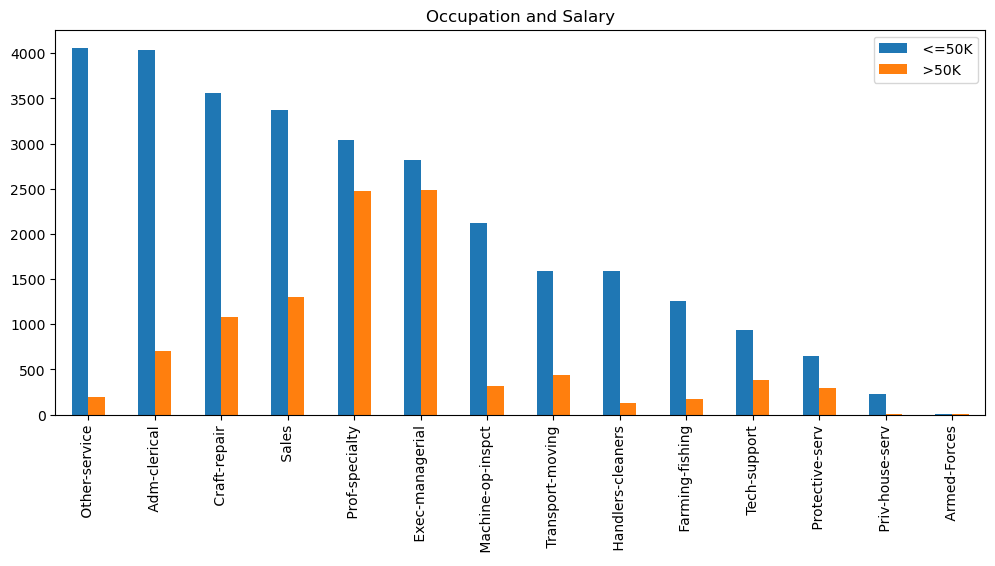

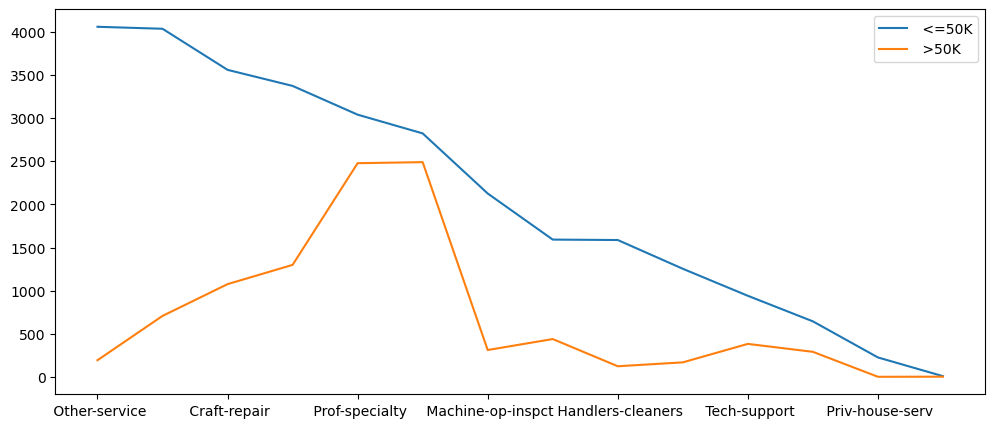

In [156]:
#occupation and salary

j_df = pd.DataFrame()
j_df[' <=50K'] = raw_data[raw_data['Salary'] == ' <=50K']['occupation'].value_counts()
j_df[' >50K'] = raw_data[raw_data['Salary'] == ' >50K']['occupation'].value_counts()
j_df.plot.bar(title='Occupation and Salary', figsize=(12,5))
j_df.plot(figsize=(12,5))

<AxesSubplot:xlabel='Salary', ylabel='occupation'>

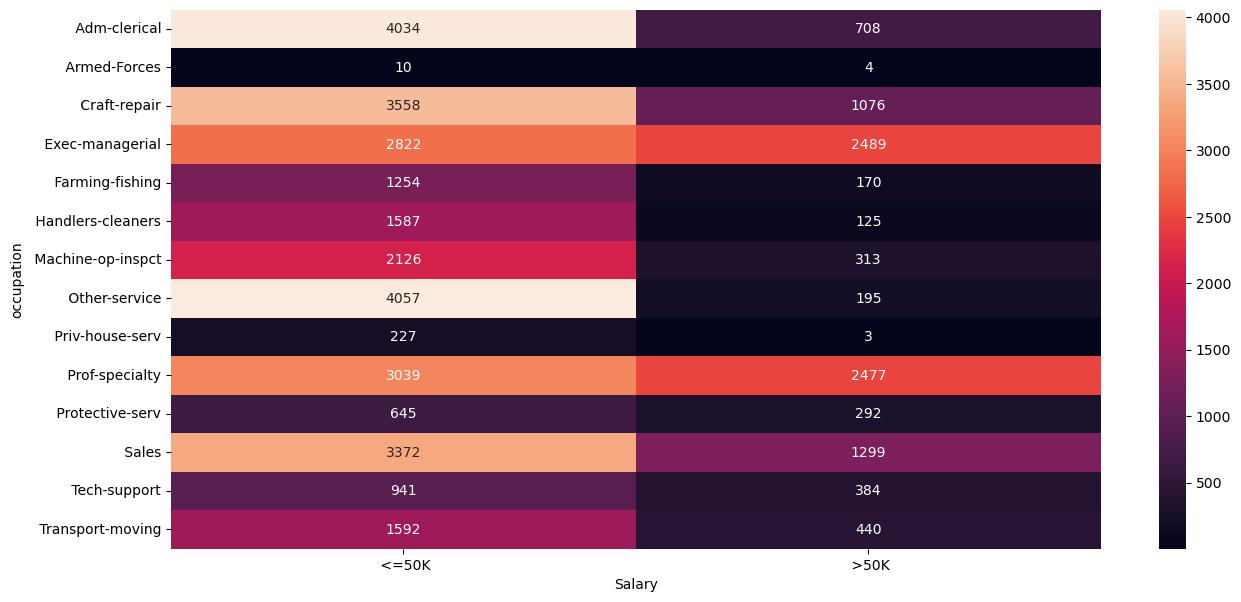

In [157]:
fig = plt.figure(figsize=(15,7))
sns.heatmap(pd.crosstab(index=raw_data['occupation'], columns=raw_data['Salary']), fmt='g', annot=True)

<AxesSubplot:>

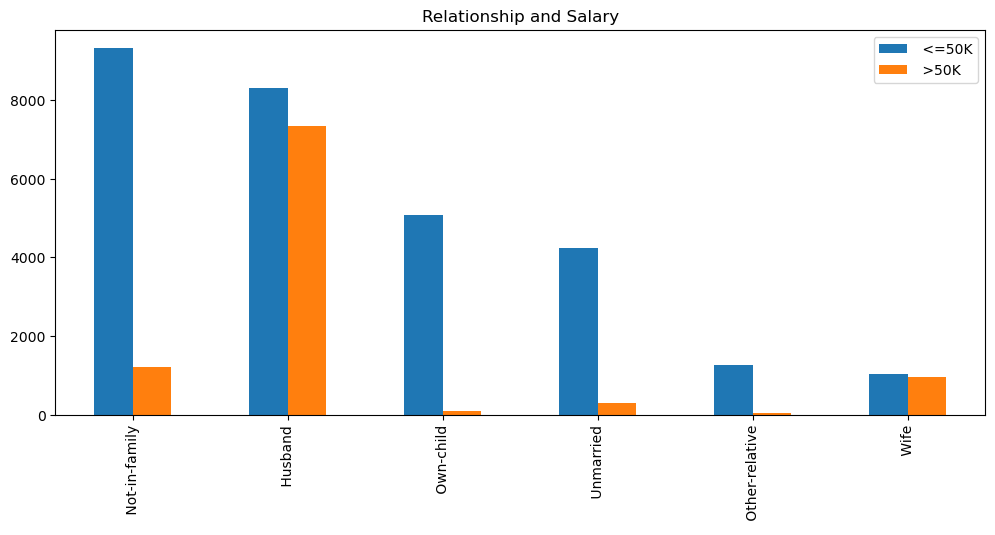

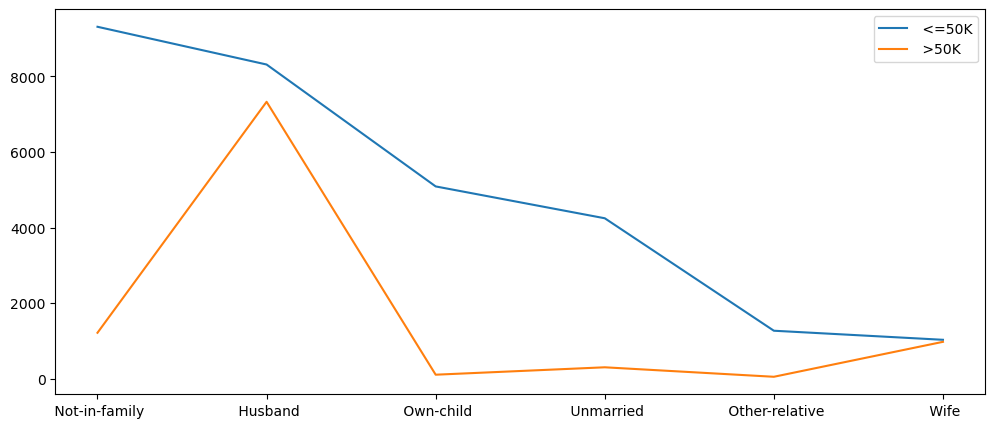

In [158]:
#relationship and salary

j_df = pd.DataFrame()
j_df[' <=50K'] = raw_data[raw_data['Salary'] == ' <=50K']['relationship'].value_counts()
j_df[' >50K'] = raw_data[raw_data['Salary'] == ' >50K']['relationship'].value_counts()
j_df.plot.bar(title='Relationship and Salary', figsize=(12,5))
j_df.plot(figsize=(12,5))

<AxesSubplot:xlabel='Salary', ylabel='relationship'>

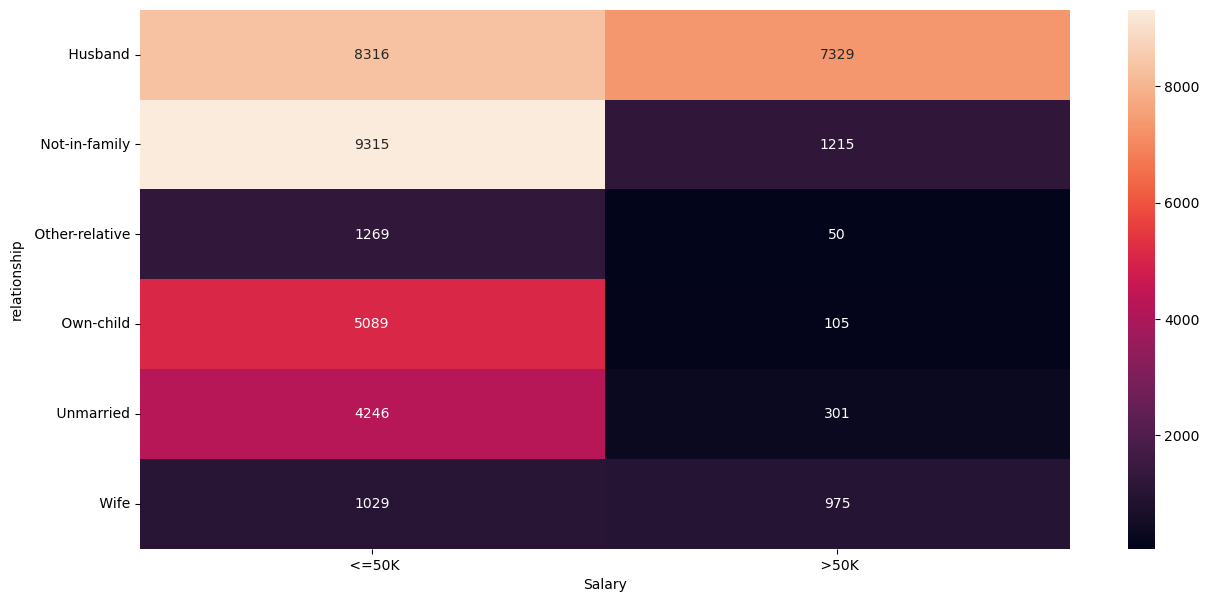

In [159]:
fig = plt.figure(figsize=(15,7))
sns.heatmap(pd.crosstab(index=raw_data['relationship'], columns=raw_data['Salary']), fmt='g', annot=True)

<AxesSubplot:>

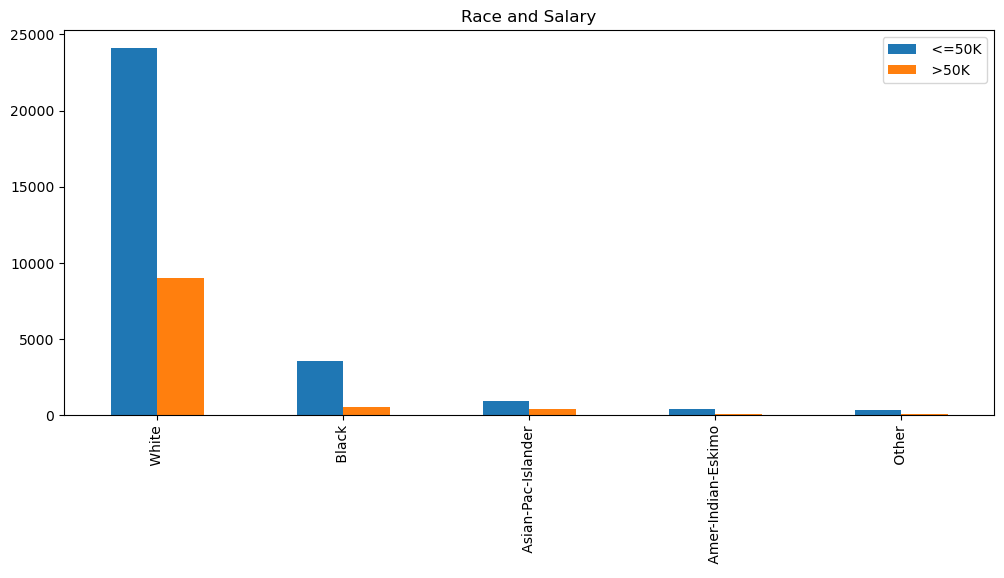

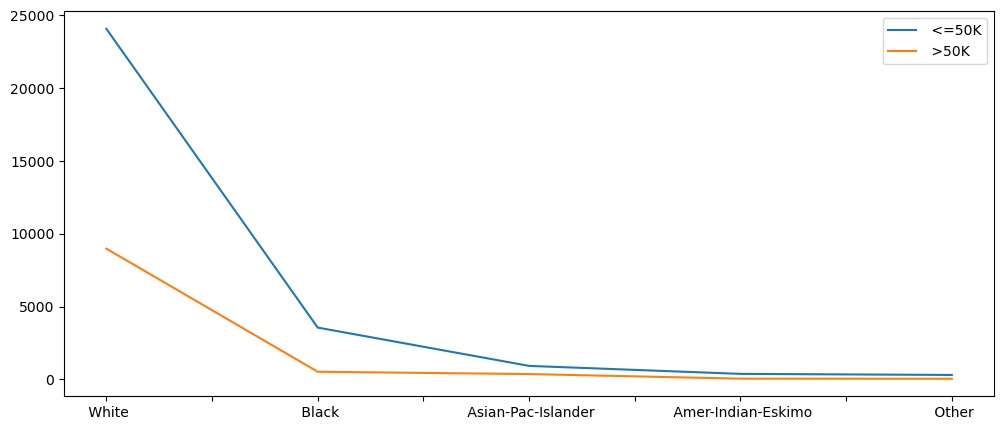

In [160]:
#race and salary 

j_df = pd.DataFrame()
j_df[' <=50K'] = raw_data[raw_data['Salary'] == ' <=50K']['race'].value_counts()
j_df[' >50K'] = raw_data[raw_data['Salary'] == ' >50K']['race'].value_counts()
j_df.plot.bar(title='Race and Salary', figsize=(12,5))
j_df.plot(figsize=(12,5))

<AxesSubplot:xlabel='Salary', ylabel='race'>

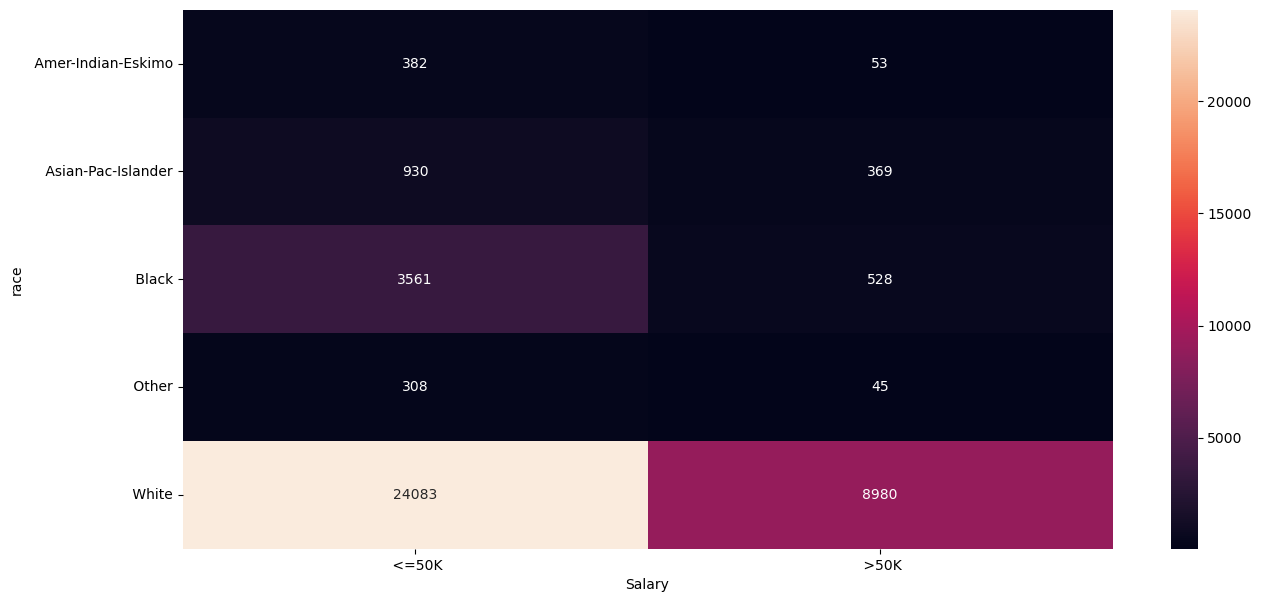

In [161]:
fig = plt.figure(figsize=(15,7))
sns.heatmap(pd.crosstab(index=raw_data['race'], columns=raw_data['Salary']), fmt='g', annot=True)

<AxesSubplot:>

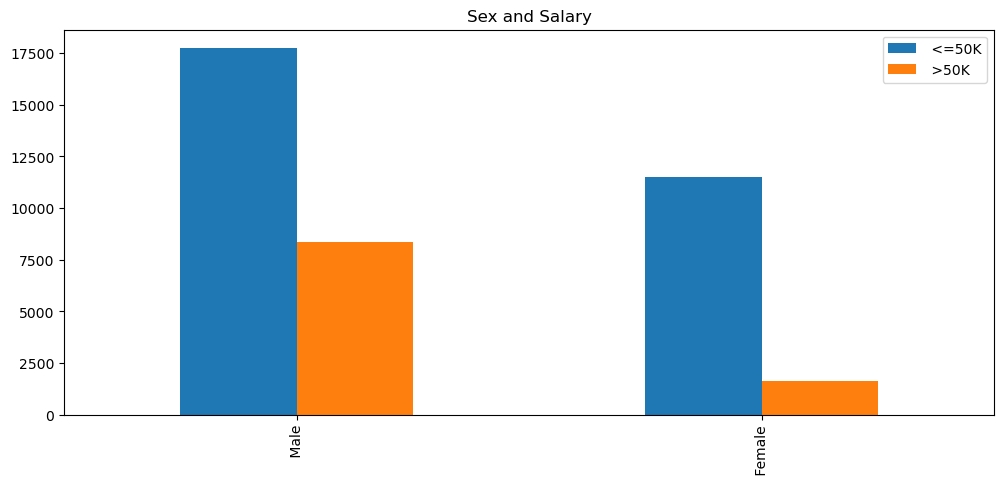

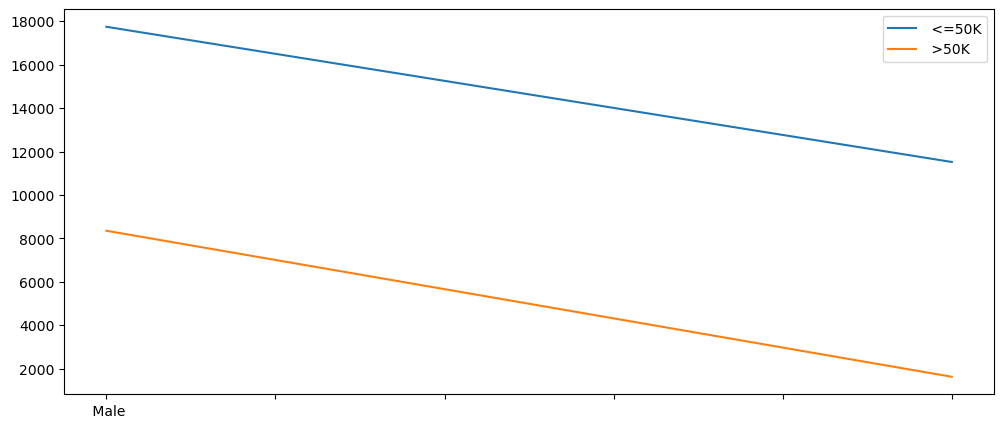

In [162]:
#sex and salary 

j_df = pd.DataFrame()
j_df[' <=50K'] = raw_data[raw_data['Salary'] == ' <=50K']['sex'].value_counts()
j_df[' >50K'] = raw_data[raw_data['Salary'] == ' >50K']['sex'].value_counts()
j_df.plot.bar(title='Sex and Salary', figsize=(12,5))
j_df.plot(figsize=(12,5))

<AxesSubplot:xlabel='Salary', ylabel='sex'>

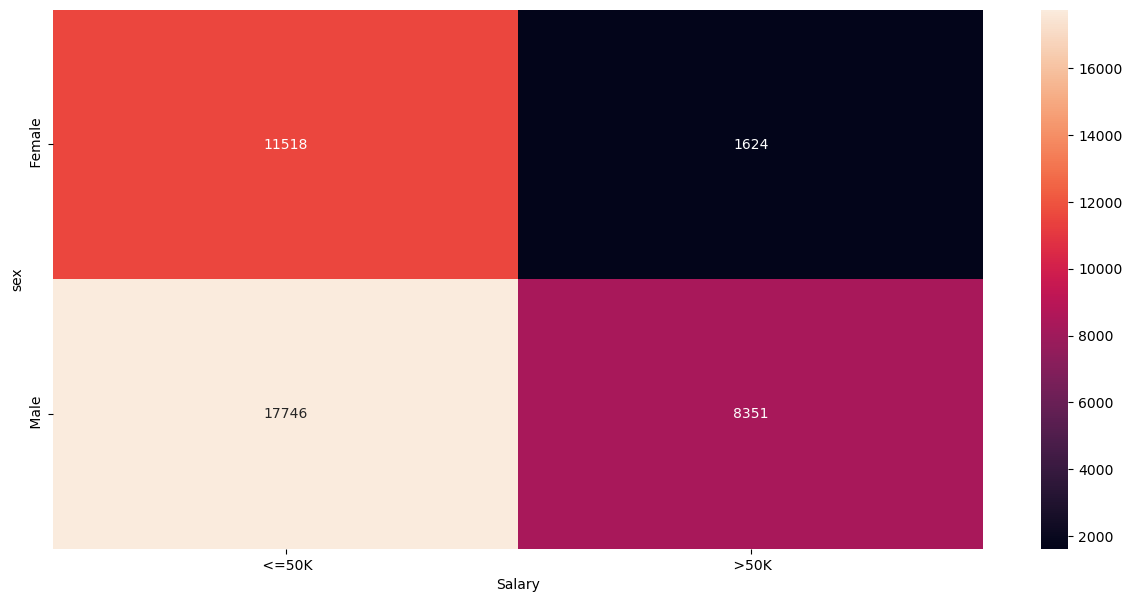

In [163]:
fig = plt.figure(figsize=(15,7))
sns.heatmap(pd.crosstab(index=raw_data['sex'], columns=raw_data['Salary']), fmt='g', annot=True)

<AxesSubplot:>

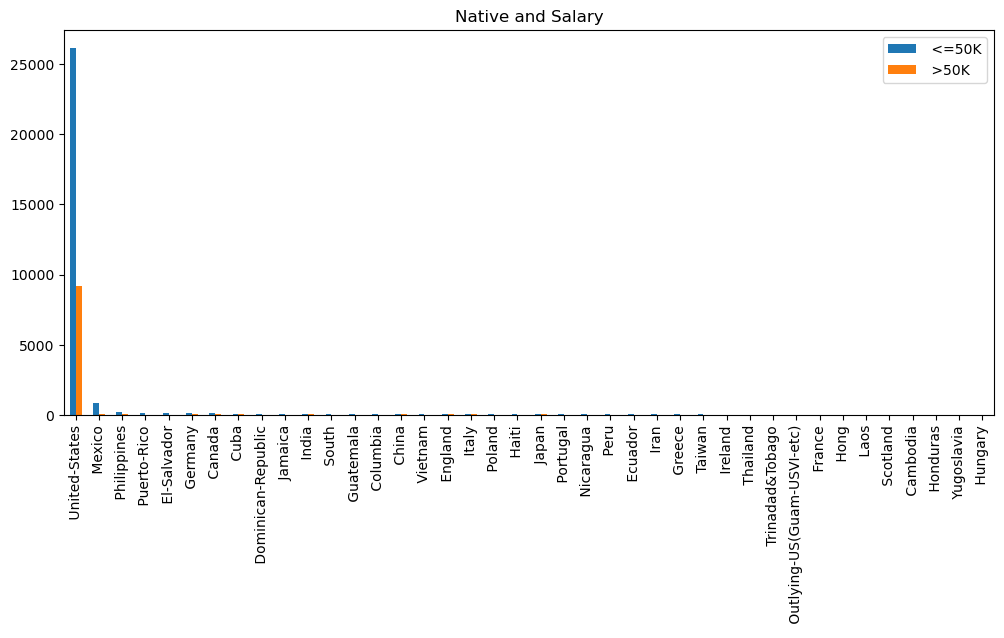

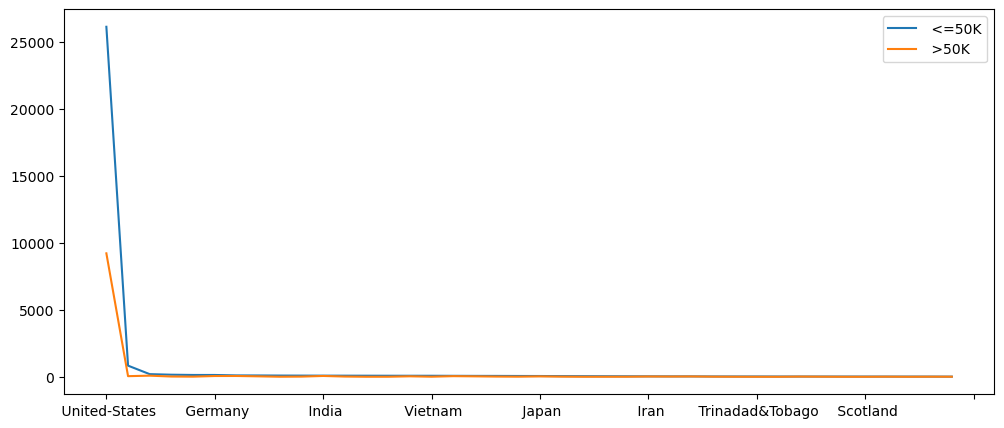

In [164]:
#native and salary 

j_df = pd.DataFrame()
j_df[' <=50K'] = raw_data[raw_data['Salary'] == ' <=50K']['native'].value_counts()
j_df[' >50K'] = raw_data[raw_data['Salary'] == ' >50K']['native'].value_counts()
j_df.plot.bar(title='Native and Salary', figsize=(12,5))
j_df.plot(figsize=(12,5))

<AxesSubplot:xlabel='Salary', ylabel='native'>

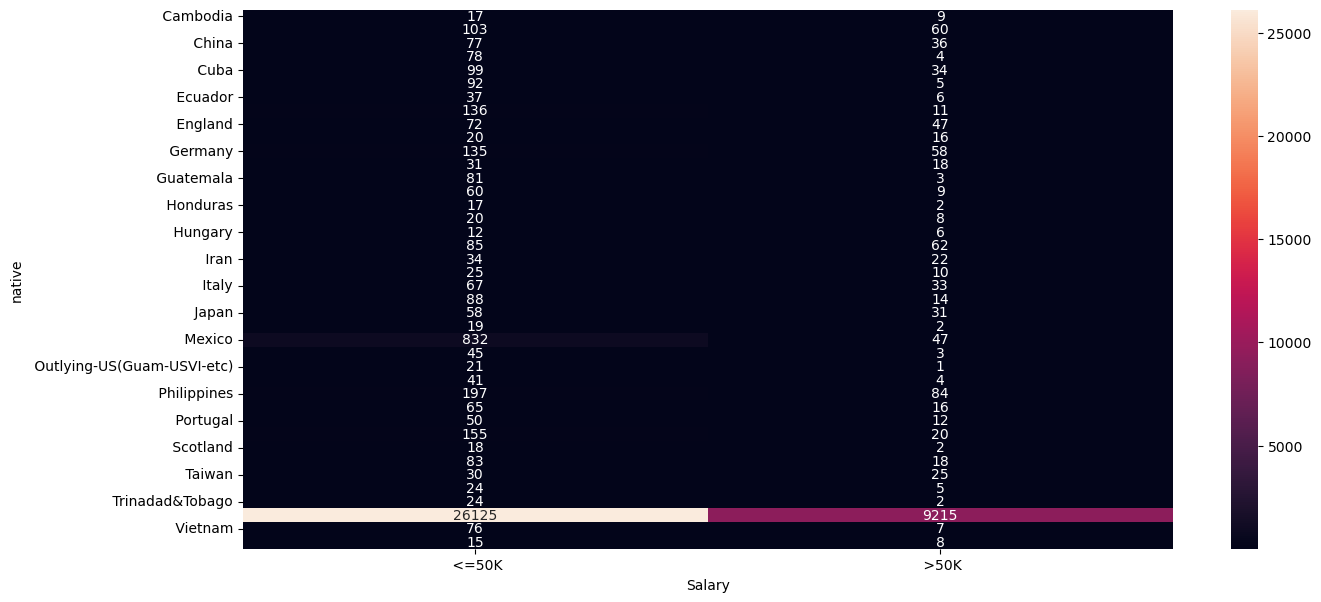

In [165]:
fig = plt.figure(figsize=(15,7))
sns.heatmap(pd.crosstab(index=raw_data['native'], columns=raw_data['Salary']), fmt='g', annot=True)

Analyzing Relation between Continuous Variables with Target Variable (Salary)

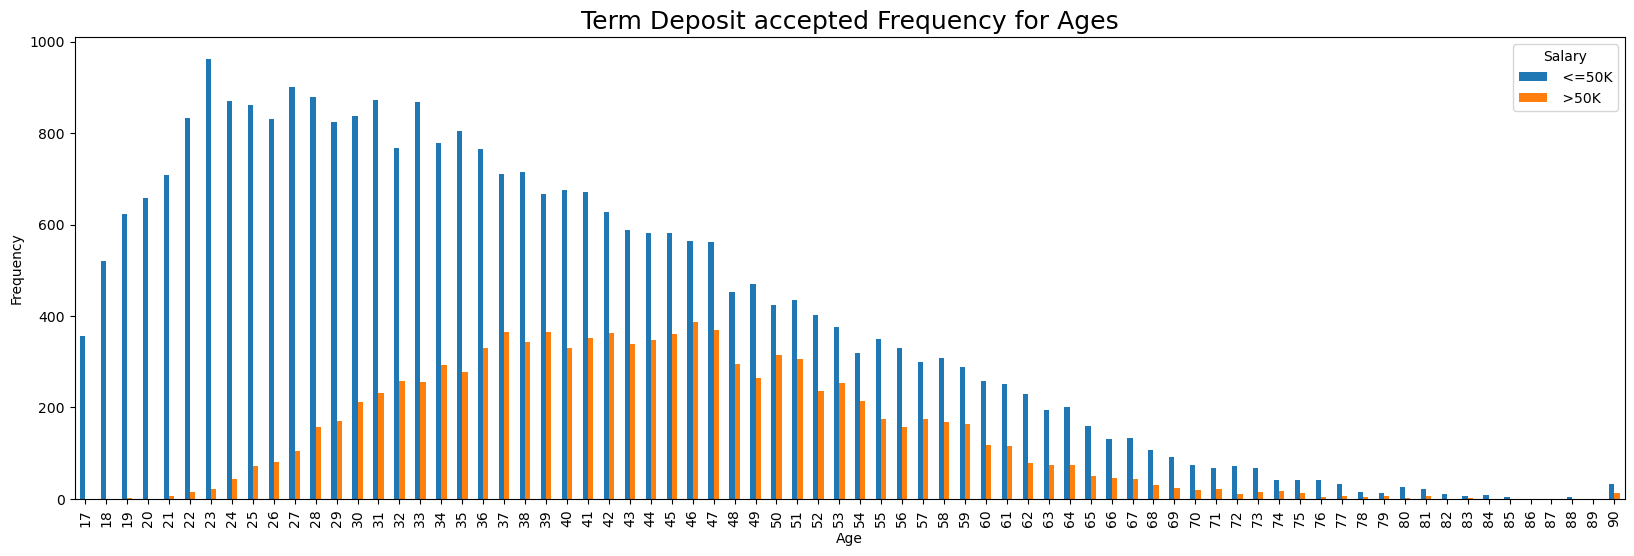

In [166]:
pd.crosstab(raw_data.age, raw_data.Salary).plot(kind='bar', figsize=(20,6))
plt.title("Term Deposit accepted Frequency for Ages", fontsize=18)
plt.xlabel("Age")
plt.ylabel('Frequency')
plt.show()

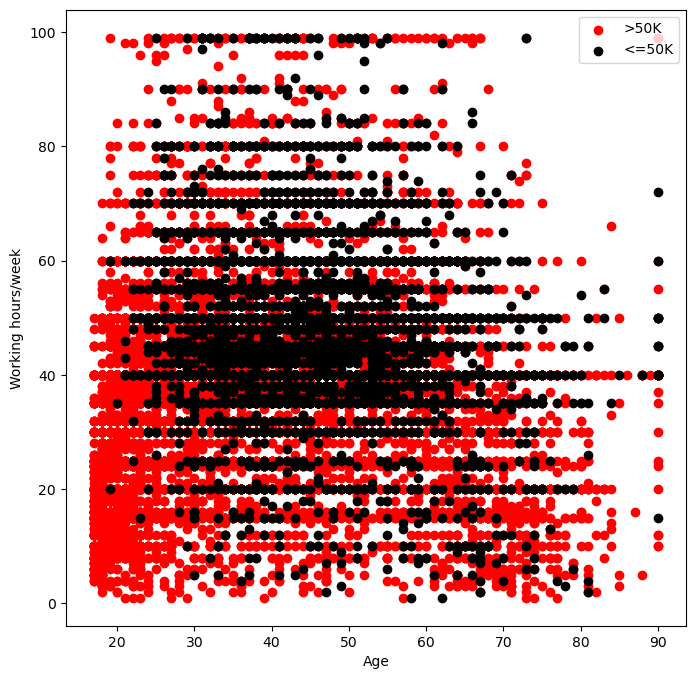

In [167]:
plt.figure(figsize=(8,8))
plt.scatter(x=raw_data.age[raw_data.Salary== ' <=50K'], y=raw_data.hoursperweek[(raw_data.Salary== ' <=50K')], c="red")
plt.scatter(x=raw_data.age[raw_data.Salary== ' >50K'], y=raw_data.hoursperweek[(raw_data.Salary== ' >50K')], c='black')
plt.legend([">50K", "<=50K"])
plt.xlabel("Age")
plt.ylabel("Working hours/week")
plt.show()

Visualizing Salary and Employee rate by Age: 

In [168]:
raw_data['age'].value_counts()

33    1123
31    1104
36    1094
35    1082
37    1075
      ... 
88       5
85       5
86       1
89       1
87       1
Name: age, Length: 74, dtype: int64

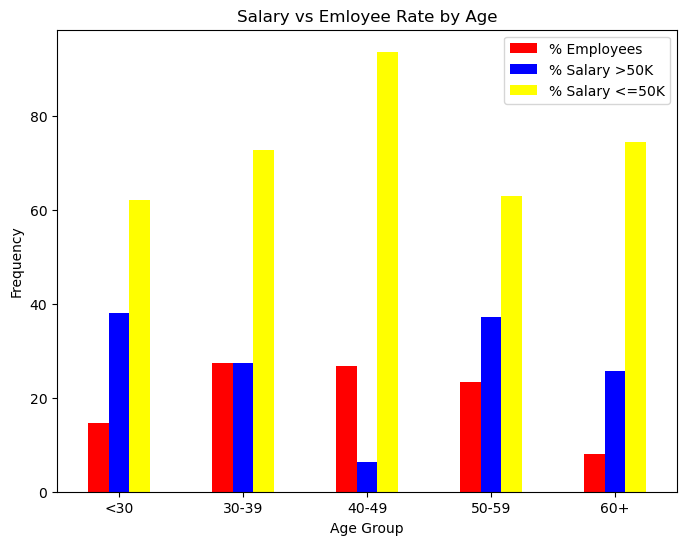

In [169]:
lst = [raw_data]

for column in lst:
    column.loc[column['age']<30, 'age_group']=20
    column.loc[(column['age']>=30) & (column['age']<40), 'age_group'] = 30
    column.loc[(column['age']>=40) & (column['age']<50), 'age_group'] = 40
    column.loc[(column['age']>=50) & (column['age']<60), 'age_group'] = 50
    column.loc[column['age']>=60, 'age_group'] = 60
    
count_age_response_pct = pd.crosstab(raw_data['Salary'], raw_data['age_group']).apply(lambda x: x/x.sum() * 100)
count_age_response_pct = count_age_response_pct.transpose()

age = pd.DataFrame(raw_data['age_group'].value_counts())
age['% Employees'] = age['age_group']*100/age['age_group'].sum()
age['% Salary >50K']= count_age_response_pct[' >50K']
age['% Salary <=50K']= count_age_response_pct[' <=50K']
age.drop('age_group', axis=1, inplace=True)

age['age'] = [30,40,50,20,60]
age = age.sort_values('age', ascending=True)

plot_age = age[['% Employees','% Salary >50K','% Salary <=50K']].plot(kind='bar', figsize=(8,6),
                                                     color=('red', 'blue','yellow'))

plt.xlabel('Age Group')
plt.ylabel('Frequency')
plt.xticks(np.arange(5), ('<30', '30-39', '40-49', '50-59', '60+'), rotation='horizontal')
plt.title('Salary vs Emloyee Rate by Age')
plt.show()


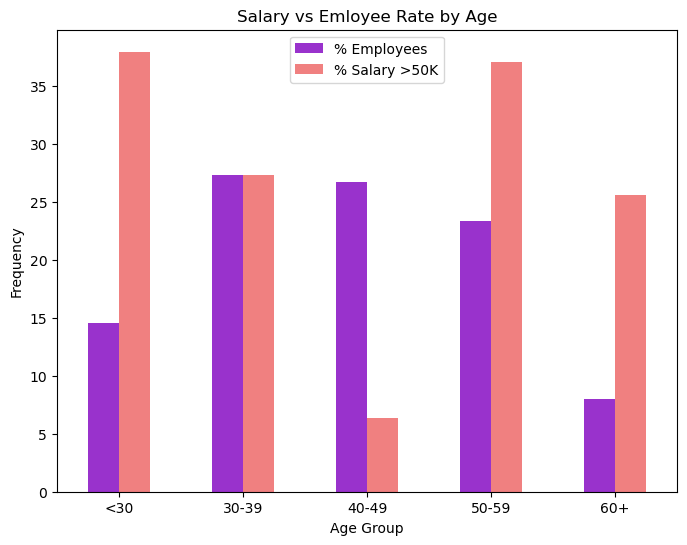

In [170]:
lst = [raw_data]

for column in lst:
    column.loc[column['age']<30, 'age_group']=20
    column.loc[(column['age']>=30) & (column['age']<40), 'age_group'] = 30
    column.loc[(column['age']>=40) & (column['age']<50), 'age_group'] = 40
    column.loc[(column['age']>=50) & (column['age']<60), 'age_group'] = 50
    column.loc[column['age']>=60, 'age_group'] = 60
    
count_age_response_pct = pd.crosstab(raw_data['Salary'], raw_data['age_group']).apply(lambda x: x/x.sum() * 100)
count_age_response_pct = count_age_response_pct.transpose()

age = pd.DataFrame(raw_data['age_group'].value_counts())
age['% Employees'] = age['age_group']*100/age['age_group'].sum()
age['% Salary >50K']= count_age_response_pct[' >50K']
#age['% Salary <=50K']= count_age_response_pct[' <=50K']
age.drop('age_group', axis=1, inplace=True)

age['age'] = [30,40,50,20,60]
age = age.sort_values('age', ascending=True)

plot_age = age[['% Employees','% Salary >50K']].plot(kind='bar', figsize=(8,6),
                                                     color=('darkorchid', 'lightcoral'))

plt.xlabel('Age Group')
plt.ylabel('Frequency')
plt.xticks(np.arange(5), ('<30', '30-39', '40-49', '50-59', '60+'), rotation='horizontal')
plt.title('Salary vs Emloyee Rate by Age')
plt.show()

for rec, label in zip(plot_age.patches,
                    age['% Salary >50K'].round(1).astype(str)):
    plot_age.text(rec.get_x() + rec.get_width()/2,
                 rec.get_height()+1,
                 label+'%',
                 ha='center',
                 color='black')


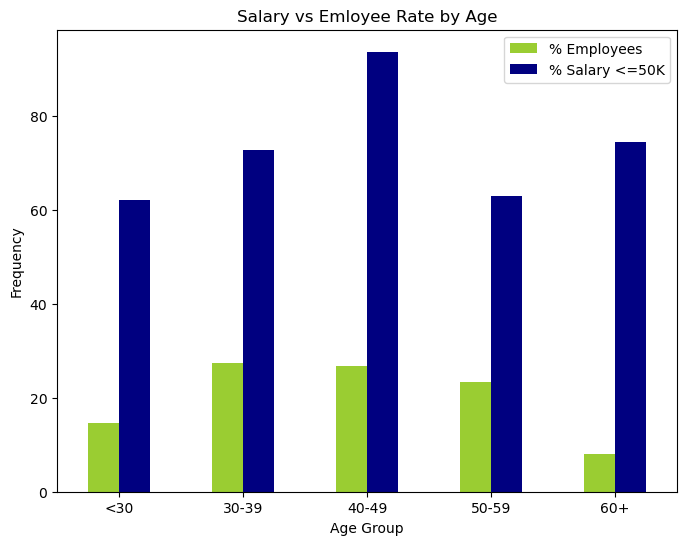

In [171]:
lst = [raw_data]

for column in lst:
    column.loc[column['age']<30, 'age_group']=20
    column.loc[(column['age']>=30) & (column['age']<40), 'age_group'] = 30
    column.loc[(column['age']>=40) & (column['age']<50), 'age_group'] = 40
    column.loc[(column['age']>=50) & (column['age']<60), 'age_group'] = 50
    column.loc[column['age']>=60, 'age_group'] = 60
    
count_age_response_pct = pd.crosstab(raw_data['Salary'], raw_data['age_group']).apply(lambda x: x/x.sum() * 100)
count_age_response_pct = count_age_response_pct.transpose()

age = pd.DataFrame(raw_data['age_group'].value_counts())
age['% Employees'] = age['age_group']*100/age['age_group'].sum()
age['% Salary >50K']= count_age_response_pct[' >50K']
age['% Salary <=50K']= count_age_response_pct[' <=50K']
#age.drop('age_group', axis=1, inplace=True)

age['age'] = [30,40,50,20,60]
age = age.sort_values('age', ascending=True)

plot_age = age[['% Employees','% Salary <=50K']].plot(kind='bar', figsize=(8,6),
                                                     color=('yellowgreen', 'navy'))

plt.xlabel('Age Group')
plt.ylabel('Frequency')
plt.xticks(np.arange(5), ('<30', '30-39', '40-49', '50-59', '60+'), rotation='horizontal')
plt.title('Salary vs Emloyee Rate by Age')
plt.show()

for rec, label in zip(plot_age.patches,
                    age['% Salary <=50K'].round(1).astype(str)):
    plot_age.text(rec.get_x() + rec.get_width()/2,
                 rec.get_height()+1,
                 label+'%',
                 ha='center',
                 color='black')



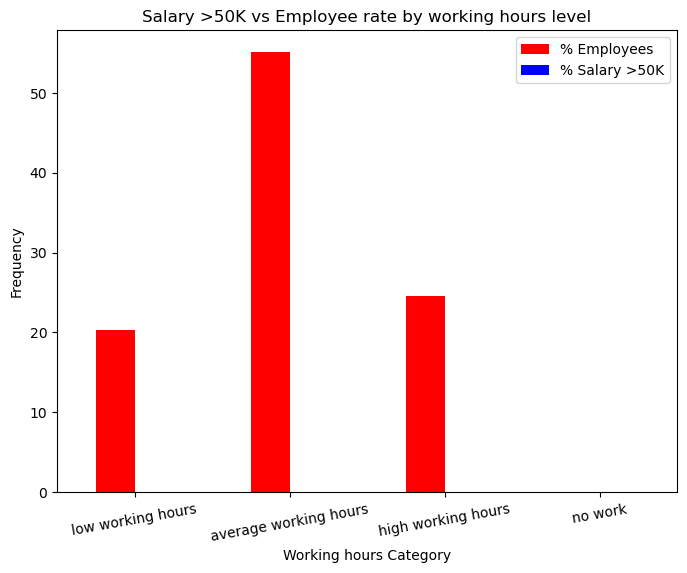

In [172]:
lst = [raw_data]

for column in lst:
    column.loc[column['hoursperweek']<=1, 'hour_group'] = 'no work'
    column.loc[(column['hoursperweek']>1) & (column['hoursperweek']<=35), 'hour_group'] = 'low working hours'
    column.loc[(column['hoursperweek']>35) & (column['hoursperweek']<=45), 'hour_group'] = 'average working hours'
    column.loc[column['hoursperweek']>45, 'hour_group'] = 'high working hours'
    
count_balance_response_pct = pd.crosstab(raw_data['Salary'], raw_data['hour_group']).apply(lambda x: x/x.sum() * 100)
count_balance_response_pct = count_age_response_pct.transpose()

bal = pd.DataFrame(raw_data['hour_group'].value_counts())
bal['% Employees'] = bal['hour_group']*100/bal['hour_group'].sum()
bal['% Salary >50K']= count_age_response_pct[' >50K']
#age['% Salary <=50K']= count_age_response_pct[' <=50K']
bal.drop('hour_group', axis=1, inplace=True)

bal['bal'] = [1,2,0,3]
bal = bal.sort_values('bal', ascending=True)

plot_balance = bal[['% Employees','% Salary >50K']].plot(kind='bar', figsize=(8,6),
                                                     color=('red', 'blue'))

plt.xlabel('Working hours Category')
plt.ylabel('Frequency')
#plt.xticks(np.arange(5), ('<30', '30-39', '40-49', '50-59', '60+'), rotation='horizontal')
plt.xticks(rotation=10)
plt.title('Salary >50K vs Employee rate by working hours level')
plt.show()

for rec, label in zip(plot_balance.patches,
                      bal['% Salary >50K'].round(1).astype(str)):
    plot_balance.text(rec.get_x() + rec.get_width()/2, 
                      rec.get_height() + 1, 
                      label+'%',  
                      ha = 'center', 
                      color = 'black')


Visualizing the Salary rate by Work Class: 

In [173]:
count_job_response_pct = pd.crosstab(raw_data['Salary'],raw_data['workclass']).apply(lambda x: x/x.sum() * 100)
count_job_response_pct.T

Salary                 <=50K       >50K
workclass                              
 Federal-gov       61.560904  38.439096
 Local-gov         70.655462  29.344538
 Private           77.789003  22.210997
 Self-emp-inc      45.141066  54.858934
 Self-emp-not-inc  71.899700  28.100300
 State-gov         72.991543  27.008457
 Without-pay       90.476190   9.523810

Visualizing the Salary rate by Education: 

In [174]:
count_job_response_pct = pd.crosstab(raw_data['Salary'],raw_data['education']).apply(lambda x: x/x.sum() * 100)
count_job_response_pct.T

Salary             <=50K       >50K
education                          
 10th          93.133803   6.866197
 11th          93.811533   6.188467
 12th          92.037037   7.962963
 1st-4th       96.313364   3.686636
 5th-6th       94.977169   5.022831
 7th-8th       93.133583   6.866417
 9th           94.224924   5.775076
 Assoc-acdm    73.537415  26.462585
 Assoc-voc     74.072082  25.927918
 Bachelors     58.417663  41.582337
 Doctorate     27.376426  72.623574
 HS-grad       82.954261  17.045739
 Masters       45.736105  54.263895
 Preschool     98.571429   1.428571
 Prof-school   25.130890  74.869110
 Some-college  78.949858  21.050142

<b> Model Developement </b>

In [231]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [176]:
salary_train.head()

age          workclass   education  educationno        maritalstatus  \
0   39          State-gov   Bachelors           13        Never-married   
1   50   Self-emp-not-inc   Bachelors           13   Married-civ-spouse   
2   38            Private     HS-grad            9             Divorced   
3   53            Private        11th            7   Married-civ-spouse   
4   28            Private   Bachelors           13   Married-civ-spouse   

           occupation    relationship    race      sex  capitalgain  \
0        Adm-clerical   Not-in-family   White     Male         2174   
1     Exec-managerial         Husband   White     Male            0   
2   Handlers-cleaners   Not-in-family   White     Male            0   
3   Handlers-cleaners         Husband   Black     Male            0   
4      Prof-specialty            Wife   Black   Female            0   

   capitalloss  hoursperweek          native  Salary  
0            0            40   United-States   <=50K  
1            0            13   United-States   <=50K  
2            0            40   United-States   <=50K  
3            0            40   United-States   <=50K  
4            0            40            Cuba   <=50K

In [177]:
salary_test.head()

age   workclass      education  educationno        maritalstatus  \
0   25     Private           11th            7        Never-married   
1   38     Private        HS-grad            9   Married-civ-spouse   
2   28   Local-gov     Assoc-acdm           12   Married-civ-spouse   
3   44     Private   Some-college           10   Married-civ-spouse   
4   34     Private           10th            6        Never-married   

           occupation    relationship    race    sex  capitalgain  \
0   Machine-op-inspct       Own-child   Black   Male            0   
1     Farming-fishing         Husband   White   Male            0   
2     Protective-serv         Husband   White   Male            0   
3   Machine-op-inspct         Husband   Black   Male         7688   
4       Other-service   Not-in-family   White   Male            0   

   capitalloss  hoursperweek          native  Salary  
0            0            40   United-States   <=50K  
1            0            50   United-States   <=50K  
2            0            40   United-States    >50K  
3            0            40   United-States    >50K  
4            0            30   United-States   <=50K

In [178]:
salary_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            15060 non-null  int64 
 1   workclass      15060 non-null  object
 2   education      15060 non-null  object
 3   educationno    15060 non-null  int64 
 4   maritalstatus  15060 non-null  object
 5   occupation     15060 non-null  object
 6   relationship   15060 non-null  object
 7   race           15060 non-null  object
 8   sex            15060 non-null  object
 9   capitalgain    15060 non-null  int64 
 10  capitalloss    15060 non-null  int64 
 11  hoursperweek   15060 non-null  int64 
 12  native         15060 non-null  object
 13  Salary         15060 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.6+ MB


In [179]:
test = salary_test.copy()
train = salary_train.copy()

In [180]:
category= ["workclass","education","maritalstatus","occupation","relationship","race","sex","native"]

In [181]:
le = LabelEncoder()

In [182]:
for i in category:
    train[i] = le.fit_transform(train[i])
    test[i] = le.fit_transform(test[i])

In [183]:
train.head()

age  workclass  education  educationno  maritalstatus  occupation  \
0   39          5          9           13              4           0   
1   50          4          9           13              2           3   
2   38          2         11            9              0           5   
3   53          2          1            7              2           5   
4   28          2          9           13              2           9   

   relationship  race  sex  capitalgain  capitalloss  hoursperweek  native  \
0             1     4    1         2174            0            40      37   
1             0     4    1            0            0            13      37   
2             1     4    1            0            0            40      37   
3             0     2    1            0            0            40      37   
4             5     2    0            0            0            40       4   

   Salary  
0   <=50K  
1   <=50K  
2   <=50K  
3   <=50K  
4   <=50K

In [184]:
test.head()

age  workclass  education  educationno  maritalstatus  occupation  \
0   25          2          1            7              4           6   
1   38          2         11            9              2           4   
2   28          1          7           12              2          10   
3   44          2         15           10              2           6   
4   34          2          0            6              4           7   

   relationship  race  sex  capitalgain  capitalloss  hoursperweek  native  \
0             3     2    1            0            0            40      37   
1             0     4    1            0            0            50      37   
2             0     4    1            0            0            40      37   
3             0     2    1         7688            0            40      37   
4             1     4    1            0            0            30      37   

   Salary  
0   <=50K  
1   <=50K  
2    >50K  
3    >50K  
4   <=50K

In [185]:
mapping = {" >50K": 1, " <=50K": 2}

In [186]:
train = train.replace({'Salary': mapping})
test = train.replace({'Salary': mapping})

In [187]:
df = train.append(test)

In [188]:
df

age  workclass  education  educationno  maritalstatus  occupation  \
0       39          5          9           13              4           0   
1       50          4          9           13              2           3   
2       38          2         11            9              0           5   
3       53          2          1            7              2           5   
4       28          2          9           13              2           9   
...    ...        ...        ...          ...            ...         ...   
30156   27          2          7           12              2          12   
30157   40          2         11            9              2           6   
30158   58          2         11            9              6           0   
30159   22          2         11            9              4           0   
30160   52          3         11            9              2           3   

       relationship  race  sex  capitalgain  capitalloss  hoursperweek  \
0                 1     4    1         2174            0            40   
1                 0     4    1            0            0            13   
2                 1     4    1            0            0            40   
3                 0     2    1            0            0            40   
4                 5     2    0            0            0            40   
...             ...   ...  ...          ...          ...           ...   
30156             5     4    0            0            0            38   
30157             0     4    1            0            0            40   
30158             4     4    0            0            0            40   
30159             3     4    1            0            0            20   
30160             5     4    0        15024            0            40   

       native  Salary  
0          37       2  
1          37       2  
2          37       2  
3          37       2  
4           4       2  
...       ...     ...  
30156      37       2  
30157      37       1  
30158      37       2  
30159      37       2  
30160      37       1  

[60322 rows x 14 columns]

In [189]:
df[df.duplicated()]

age  workclass  education  educationno  maritalstatus  occupation  \
326     33          2          9           13              2           3   
364     27          2          9           13              4           2   
518     24          2         11            9              4           5   
525     24          2         11            9              4           2   
619     33          2          9           13              2           3   
...    ...        ...        ...          ...            ...         ...   
30156   27          2          7           12              2          12   
30157   40          2         11            9              2           6   
30158   58          2         11            9              6           0   
30159   22          2         11            9              4           0   
30160   52          3         11            9              2           3   

       relationship  race  sex  capitalgain  capitalloss  hoursperweek  \
326               0     4    1            0            0            40   
364               1     4    1            0            0            50   
518               4     2    0            0            0            40   
525               3     4    1            0            0            40   
619               0     4    1            0            0            40   
...             ...   ...  ...          ...          ...           ...   
30156             5     4    0            0            0            38   
30157             0     4    1            0            0            40   
30158             4     4    0            0            0            40   
30159             3     4    1            0            0            20   
30160             5     4    0        15024            0            40   

       native  Salary  
326        37       1  
364        37       2  
518        37       2  
525        37       2  
619        37       1  
...       ...     ...  
30156      37       2  
30157      37       1  
30158      37       2  
30159      37       2  
30160      37       1  

[33419 rows x 14 columns]

In [190]:
df[df.duplicated()].shape

(33419, 14)

In [191]:
df.drop_duplicates(inplace=True)

In [192]:
df.shape

(26903, 14)

In [193]:
df.describe()

age     workclass     education   educationno  maritalstatus  \
count  26903.000000  26903.000000  26903.000000  26903.000000   26903.000000   
mean      39.049140      2.217597     10.254135     10.144296       2.563394   
std       13.188825      0.996802      3.864670      2.620154       1.528599   
min       17.000000      0.000000      0.000000      1.000000       0.000000   
25%       29.000000      2.000000      9.000000      9.000000       2.000000   
50%       38.000000      2.000000     11.000000     10.000000       2.000000   
75%       48.000000      2.000000     12.000000     13.000000       4.000000   
max       90.000000      6.000000     15.000000     16.000000       6.000000   

         occupation  relationship          race           sex   capitalgain  \
count  26903.000000  26903.000000  26903.000000  26903.000000  26903.000000   
mean       6.053674      1.449578      3.645950      0.667621   1215.443259   
std        4.026816      1.618758      0.871165      0.471075   7805.366384   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        3.000000      0.000000      4.000000      0.000000      0.000000   
50%        6.000000      1.000000      4.000000      1.000000      0.000000   
75%        9.000000      3.000000      4.000000      1.000000      0.000000   
max       13.000000      5.000000      4.000000      1.000000  99999.000000   

        capitalloss  hoursperweek        native        Salary  
count  26903.000000  26903.000000  26903.000000  26903.000000  
mean      98.427499     41.164591     35.228711      1.744266  
std      425.493211     12.347051      6.272069      0.436281  
min        0.000000      1.000000      0.000000      1.000000  
25%        0.000000     40.000000     37.000000      1.000000  
50%        0.000000     40.000000     37.000000      2.000000  
75%        0.000000     45.000000     37.000000      2.000000  
max     4356.000000     99.000000     39.000000      2.000000

In [194]:
df.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

Finding Correlation:


In [195]:
corr = df.corr()

<AxesSubplot:>

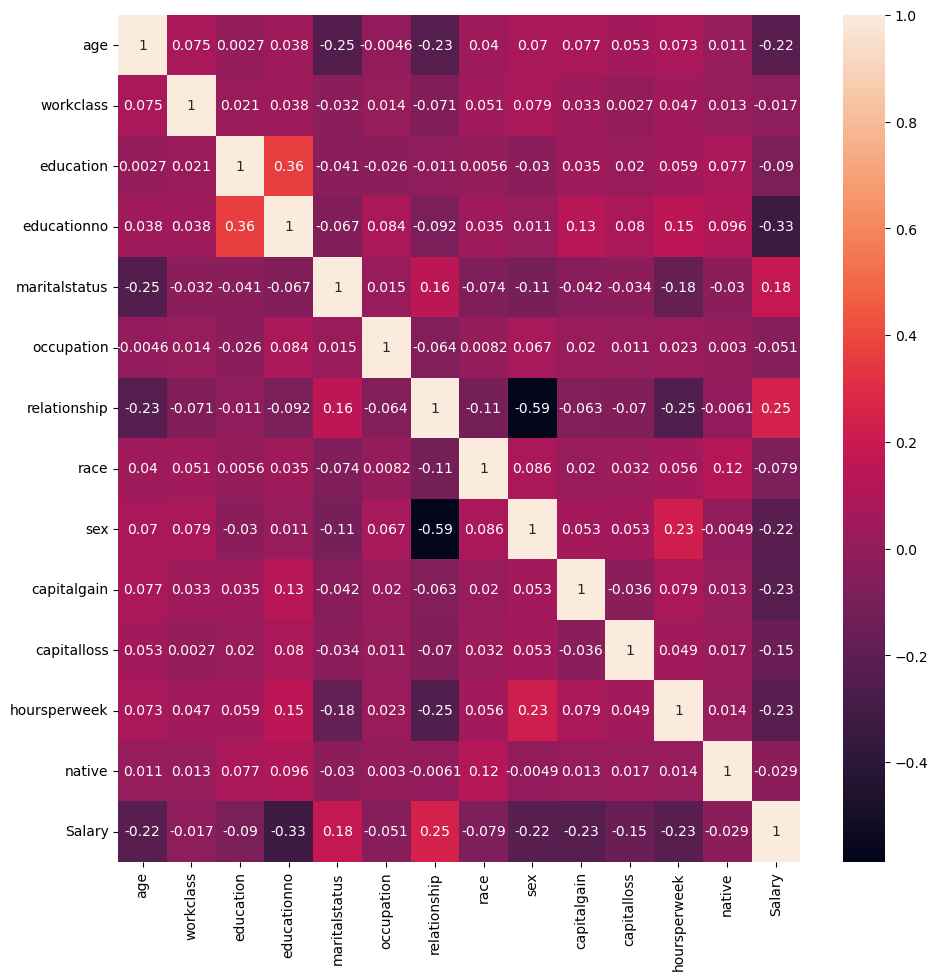

In [196]:
plt.figure(figsize=(11,11))
sns.heatmap(corr, annot=True)

Skewness:  -0.9038748901321835
Kurtosis:  0.6247650396386675


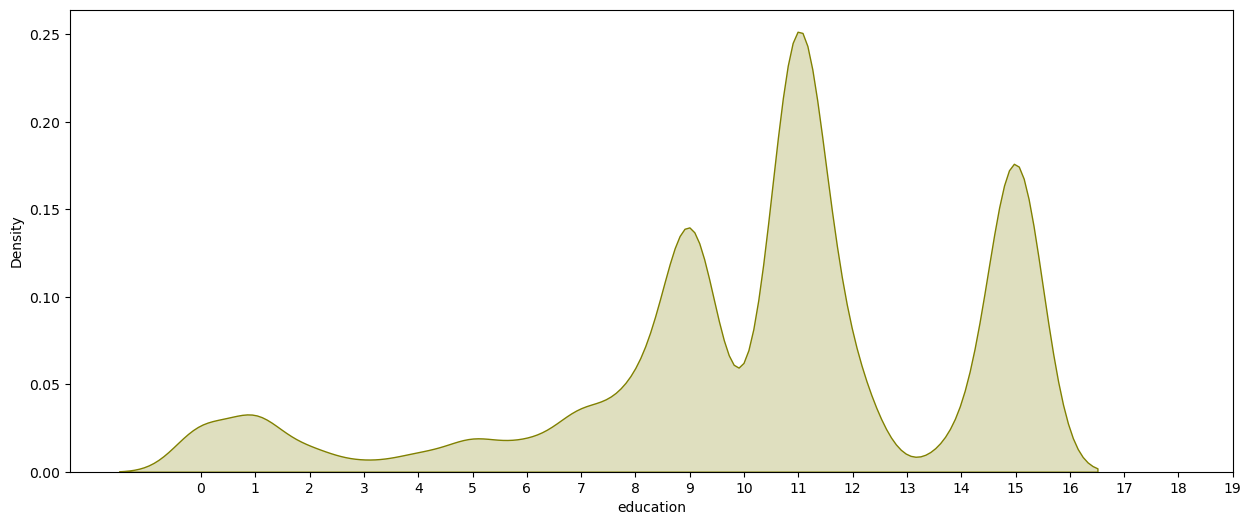

In [197]:
plt.figure(figsize=(15,6))
print("Skewness: ", df['education'].skew())
print("Kurtosis: ", df['education'].kurt())

ax = sns.kdeplot(df['education'], shade=True, color='olive')
plt.xticks([i for i in range(0,20,1)])
plt.show()

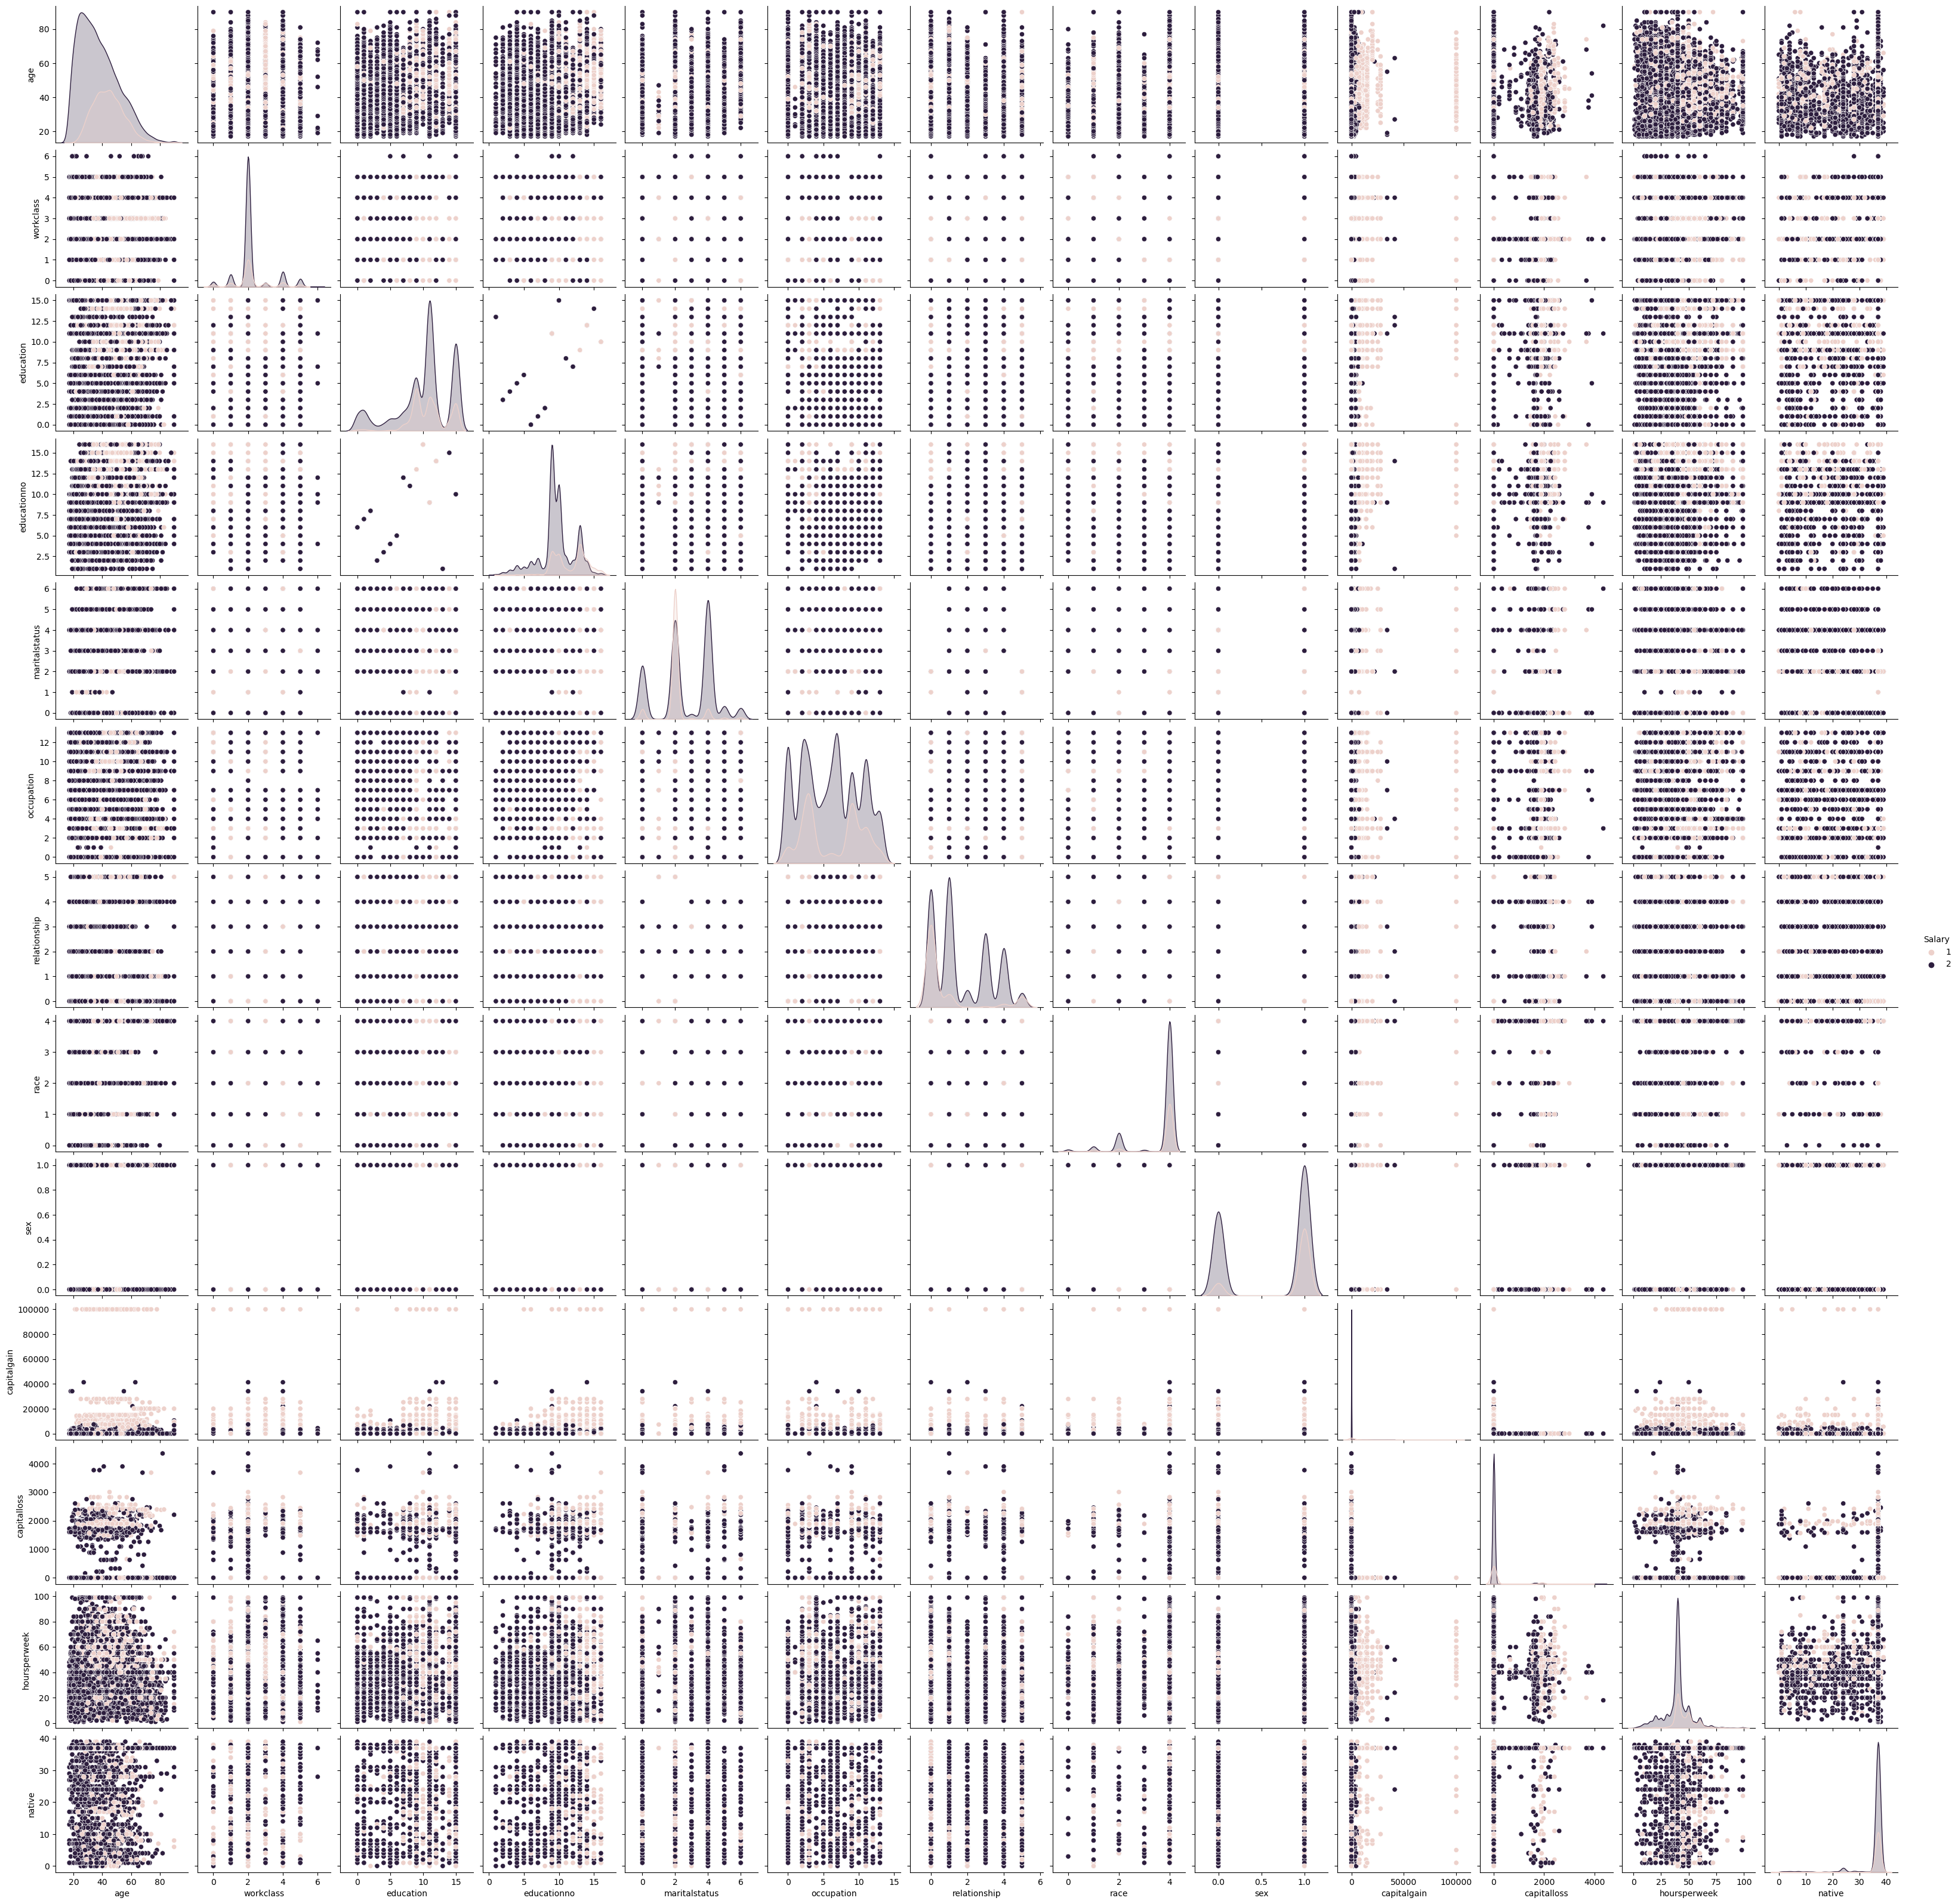

In [198]:
sns.pairplot(df, hue='Salary')

In [218]:
df.head()

age  workclass  education  educationno  maritalstatus  occupation  \
0   39          5          9           13              4           0   
1   50          4          9           13              2           3   
2   38          2         11            9              0           5   
3   53          2          1            7              2           5   
4   28          2          9           13              2           9   

   relationship  race  sex  capitalgain  capitalloss  hoursperweek  native  \
0             1     4    1         2174            0            40      37   
1             0     4    1            0            0            13      37   
2             1     4    1            0            0            40      37   
3             0     2    1            0            0            40      37   
4             5     2    0            0            0            40       4   

   Salary  
0       2  
1       2  
2       2  
3       2  
4       2

In [220]:
df.shape

(26903, 14)

SVM

In [ ]:
from sklea

In [223]:
X = df.iloc[:,0:13]
X

age  workclass  education  educationno  maritalstatus  occupation  \
0       39          5          9           13              4           0   
1       50          4          9           13              2           3   
2       38          2         11            9              0           5   
3       53          2          1            7              2           5   
4       28          2          9           13              2           9   
...    ...        ...        ...          ...            ...         ...   
30154   53          2         12           14              2           3   
30155   22          2         15           10              4          10   
30156   27          2          7           12              2          12   
30158   58          2         11            9              6           0   
30160   52          3         11            9              2           3   

       relationship  race  sex  capitalgain  capitalloss  hoursperweek  native  
0                 1     4    1         2174            0            40      37  
1                 0     4    1            0            0            13      37  
2                 1     4    1            0            0            40      37  
3                 0     2    1            0            0            40      37  
4                 5     2    0            0            0            40       4  
...             ...   ...  ...          ...          ...           ...     ...  
30154             0     4    1            0            0            40      37  
30155             1     4    1            0            0            40      37  
30156             5     4    0            0            0            38      37  
30158             4     4    0            0            0            40      37  
30160             5     4    0        15024            0            40      37  

[26903 rows x 13 columns]

In [224]:
Y = df.iloc[:,-1]
Y

0        2
1        2
2        2
3        2
4        2
        ..
30154    1
30155    2
30156    2
30158    2
30160    1
Name: Salary, Length: 26903, dtype: int64

In [225]:
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size = 0.3)

In [226]:
print("x_train: ", x_train.shape)
print("x_test: ", x_test.shape)
print("y_train: ", y_train.shape)
print("y_test: ", y_test.shape)

x_train:  (18832, 13)
x_test:  (8071, 13)
y_train:  (18832,)
y_test:  (8071,)


Normalization: 

In [227]:
def norm_function(i):
    x = (i-i.mean())/(i.max()-i.mean())
    return x

In [228]:
x_train = norm_function(x_train)
x_test = norm_function(x_test)

Linear: 

In [229]:
model_linear = SVC(kernel='linear')
model_linear.fit(x_train, y_train)
pred_test_linear = model_linear.predict(x_test)
print("Accuracy: ", metrics.accuracy_score(y_test, pred_test_linear))

Accuracy:  0.8015115846859125


In [232]:
confusion_matrix(y_test, pred_test_linear)

array([[ 660, 1434],
       [ 168, 5809]], dtype=int64)

Poly: 

In [233]:
model_poly = SVC(kernel='poly')
model_poly.fit(x_train, y_train)
pred_test_poly = model_poly.predict(x_test)
print("Accuracy: ", metrics.accuracy_score(y_test, pred_test_poly))

Accuracy:  0.7789617147813158


In [ ]:
confusion_matrix(y_test, pred_test_poly)

RBF: Radial Basis Function

In [234]:
model_rbf = SVC(kernel='rbf')
model_rbf.fit(x_train, y_train)
pred_test_rbf = model_rbf.predict(x_test)
print("Accuracy: ", metrics.accuracy_score(y_test, pred_test_rbf))

Accuracy:  0.8096890100359311


In [235]:
confusion_matrix(y_test, pred_test_rbf)

array([[ 872, 1222],
       [ 314, 5663]], dtype=int64)

Sigmoid: 

In [209]:
model_sigmoid = SVC(kernel='sigmoid')
model_sigmoid.fit(x_train, y_train)
pred_test_sigmoid = model_sigmoid.predict(x_test)
print("Accuracy: ", metrics.accuracy_score(y_test, pred_test_sigmoid))

Accuracy:  0.7701336162594078


Conclusion: <br><br>
Radial Basis Function (RBF) gives the best Accuracy

Plotting the data using PCA and selecting only two variables:

In [237]:
from sklearn.decomposition import PCA

In [238]:
ytt = y_train.to_numpy()

In [239]:
ytt

array([1, 2, 1, ..., 2, 1, 1], dtype=int64)

In [240]:
pca = PCA(n_components=2)

In [241]:
x_train_new = pca.fit_transform(x_train)

In [242]:
x_train_new

array([[-0.87132861, -0.49172453],
       [-0.8926954 , -0.47057355],
       [-1.137645  , -0.2366316 ],
       ...,
       [-0.87418938, -0.5321237 ],
       [-1.14265461, -0.25534717],
       [-1.14335946, -0.25709582]])

In [243]:
model_rbf.fit(x_train_new, ytt)

SVC()

In [244]:
from mlxtend.plotting import plot_decision_regions

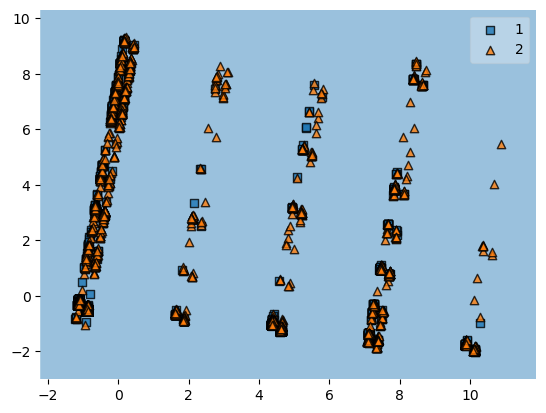

In [245]:
plot_decision_regions(x_train_new, ytt, clf=model_rbf)
plt.show()